# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
numba 0.57.0 requires numpy<1.25,>=1.21, but you have numpy 1.25.2 which is incompatible.


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score


import statsmodels.api as sm

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay #to plot confusion matric
#from sklearn.metrics import plot_confusion_matrix

from sklearn.linear_model import LogisticRegression #to build the model
from sklearn.tree import DecisionTreeClassifier#to build the model

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth',400)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
# To supress numerical display in scientific notations
warnings.filterwarnings('ignore') # To supress warnings
 # set the background for the graphs
plt.style.use('ggplot')

## Loading the dataset

In [3]:
df = pd.read_csv("Loan_Modelling.csv")

# Data Overview

In [4]:
df.shape

(5000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
df.head()

ID  Age  Experience  Income  ZIPCode  Family   CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4 1.60000          1         0   
1   2   45          19      34    90089       3 1.50000          1         0   
2   3   39          15      11    94720       1 1.00000          1         0   
3   4   35           9     100    94112       1 2.70000          2         0   
4   5   35           8      45    91330       4 1.00000          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [7]:
df.isnull().sum().sort_values(ascending=False)

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

# Observations

1.There are 5000 rows and 14 columns in a dataset
2.all the columns are numerical
3.Personal_Loan is a target variable

# Sanity checks

there are no null values in a dataset

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

In [9]:
df.describe().T

count        mean        std         min         25%  \
ID                 5000.00000  2500.50000 1443.52000     1.00000  1250.75000   
Age                5000.00000    45.33840   11.46317    23.00000    35.00000   
Experience         5000.00000    20.10460   11.46795    -3.00000    10.00000   
Income             5000.00000    73.77420   46.03373     8.00000    39.00000   
ZIPCode            5000.00000 93169.25700 1759.45509 90005.00000 91911.00000   
Family             5000.00000     2.39640    1.14766     1.00000     1.00000   
CCAvg              5000.00000     1.93794    1.74766     0.00000     0.70000   
Education          5000.00000     1.88100    0.83987     1.00000     1.00000   
Mortgage           5000.00000    56.49880  101.71380     0.00000     0.00000   
Personal_Loan      5000.00000     0.09600    0.29462     0.00000     0.00000   
Securities_Account 5000.00000     0.10440    0.30581     0.00000     0.00000   
CD_Account         5000.00000     0.06040    0.23825     0.00000     0.00000   
Online             5000.00000     0.59680    0.49059     0.00000     0.00000   
CreditCard         5000.00000     0.29400    0.45564     0.00000     0.00000   

                           50%         75%         max  
ID                  2500.50000  3750.25000  5000.00000  
Age                   45.00000    55.00000    67.00000  
Experience            20.00000    30.00000    43.00000  
Income                64.00000    98.00000   224.00000  
ZIPCode            93437.00000 94608.00000 96651.00000  
Family                 2.00000     3.00000     4.00000  
CCAvg                  1.50000     2.50000    10.00000  
Education              2.00000     3.00000     3.00000  
Mortgage               0.00000   101.00000   635.00000  
Personal_Loan          0.00000     0.00000     1.00000  
Securities_Account     0.00000     0.00000     1.00000  
CD_Account             0.00000     0.00000     1.00000  
Online                 1.00000     1.00000     1.00000  
CreditCard             0.00000     1.00000     1.00000

Observations

Customers' age is in the range of 23 to 67, with a mean and median around 45.
The maximum experience among customers is 43 years, while the mean and median experience are around 20.
Income ranges from 8,000 USD to 224,000 USD. The mean income is 73,000 USD, and the median income is 64,000 USD. The maximum salary of 224,000 USD
The maximum mortgage taken by a customer is 635,000 USD.
The average spending on a credit card per month ranges from 1,000 USD to 10,000 USD, with a mean of 1,900 USD and a median of 1,500 USD.
There are 1,095 customers from Los Angeles County.
Out of the customers, 480 had borrowed a loan before.

# Univariate Analysis

In [10]:
def dist_box(data):
    fig,(ax_box,ax_dis)  = plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.35, .85)},figsize=(9, 5))
    sns.boxplot(x=data,showmeans=True, orient='h',color="red",ax=ax_box)
    ax_box.set(xlabel='')
    sns.histplot(data,kde=False,color='blue',ax=ax_dis)

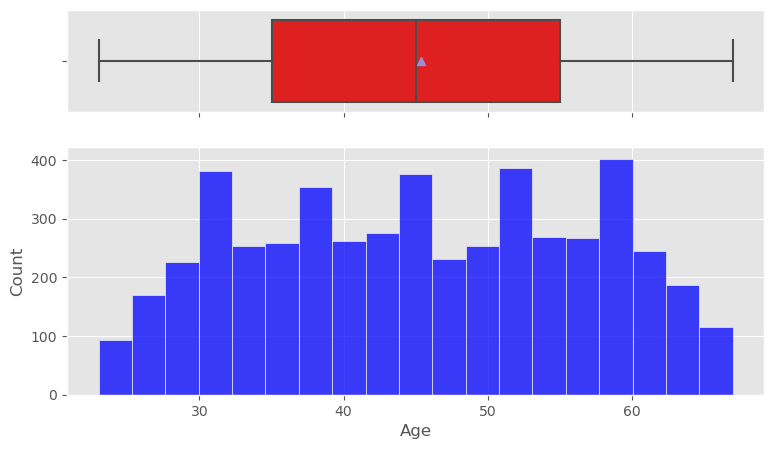

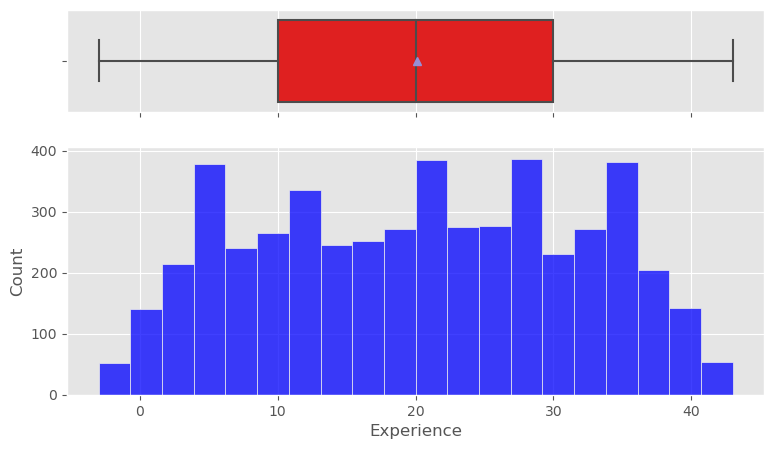

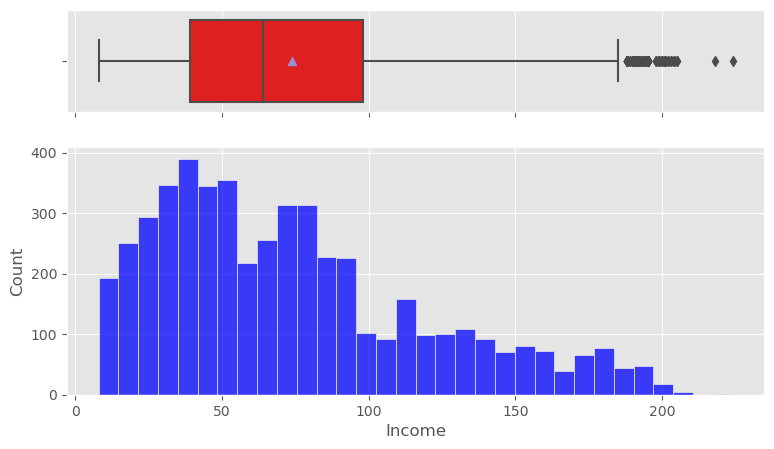

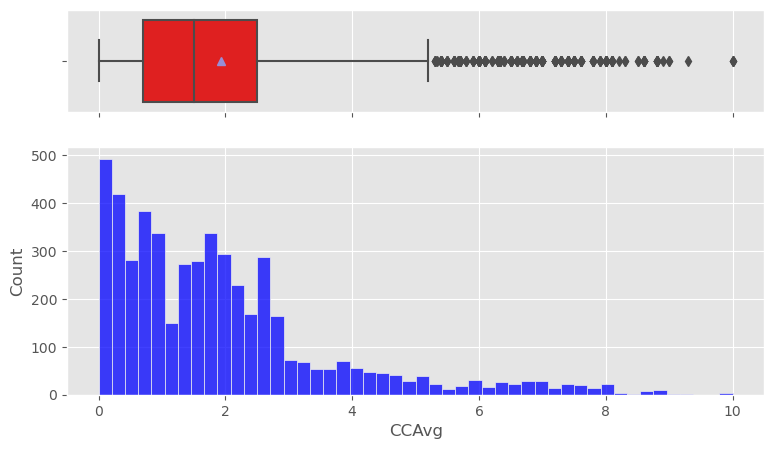

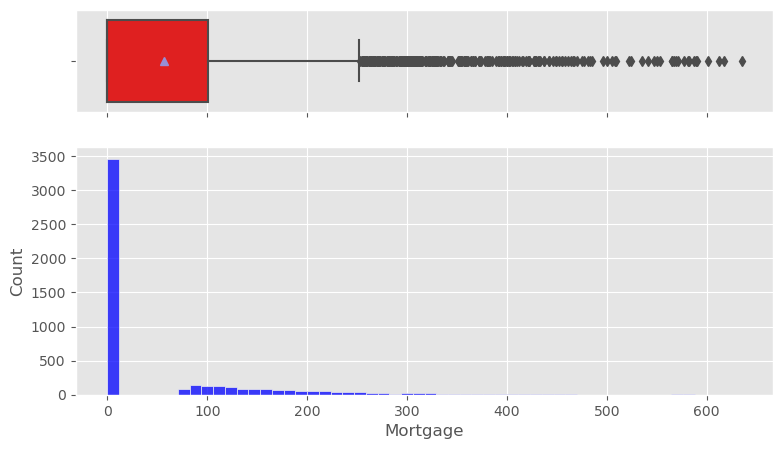

In [11]:
cols=  ['Age','Experience','Income','CCAvg','Mortgage']
for i in range(len(cols)):
    dist_box(df[cols[i]])

Observations

Age and Experience: Both age and experience distributions exhibit a spike at 5 points, indicating a concentration of customers around certain age and experience values. This suggests that there might be a specific group or generation represented in the data.

Income: The income distribution is right-skewed, which means it has a tail extending towards higher income values. Additionally, there are some outliers on the higher side of the distribution. Clipping or capping these outliers could help normalize the income distribution and mitigate the impact of extreme values.

Average Monthly Credit: The distribution of average monthly credit spending is also right-skewed, indicating a tail towards higher spending amounts. There are several outliers on the higher side of the distribution. Clipping or capping these outliers could help bring the distribution closer to a normal shape and reduce the influence of extreme values.

Mortgage: The majority of customers have a mortgage value of 0, which suggests that a significant portion of the customers do not have mortgages. The distribution of mortgage values is right-skewed, meaning there is a tail towards higher mortgage amounts. Similar to income and credit spending, there are outliers on the higher side of the distribution. Clipping or capping these outliers could help normalize the distribution and handle the impact of extreme values.

In [13]:
# create bins
df['Agebin'] = pd.cut(df['Age'], bins = [0, 30, 40, 50, 60, 100], labels = ['18-30', '31-40', '41-50', '51-60', '60-100'])
df["Income_group"] = pd.cut(
    x=df["Income"],
    bins=[0, 50, 140, 224],
    labels=["Lower", "Middle", "High"],
)
df["Spending_group"] = pd.cut( x=df["CCAvg"], bins=[0.00000, 0.70000, 2.50000, 10.00000],
    labels=["Low", "Medium", "High"],include_lowest=True ,
)

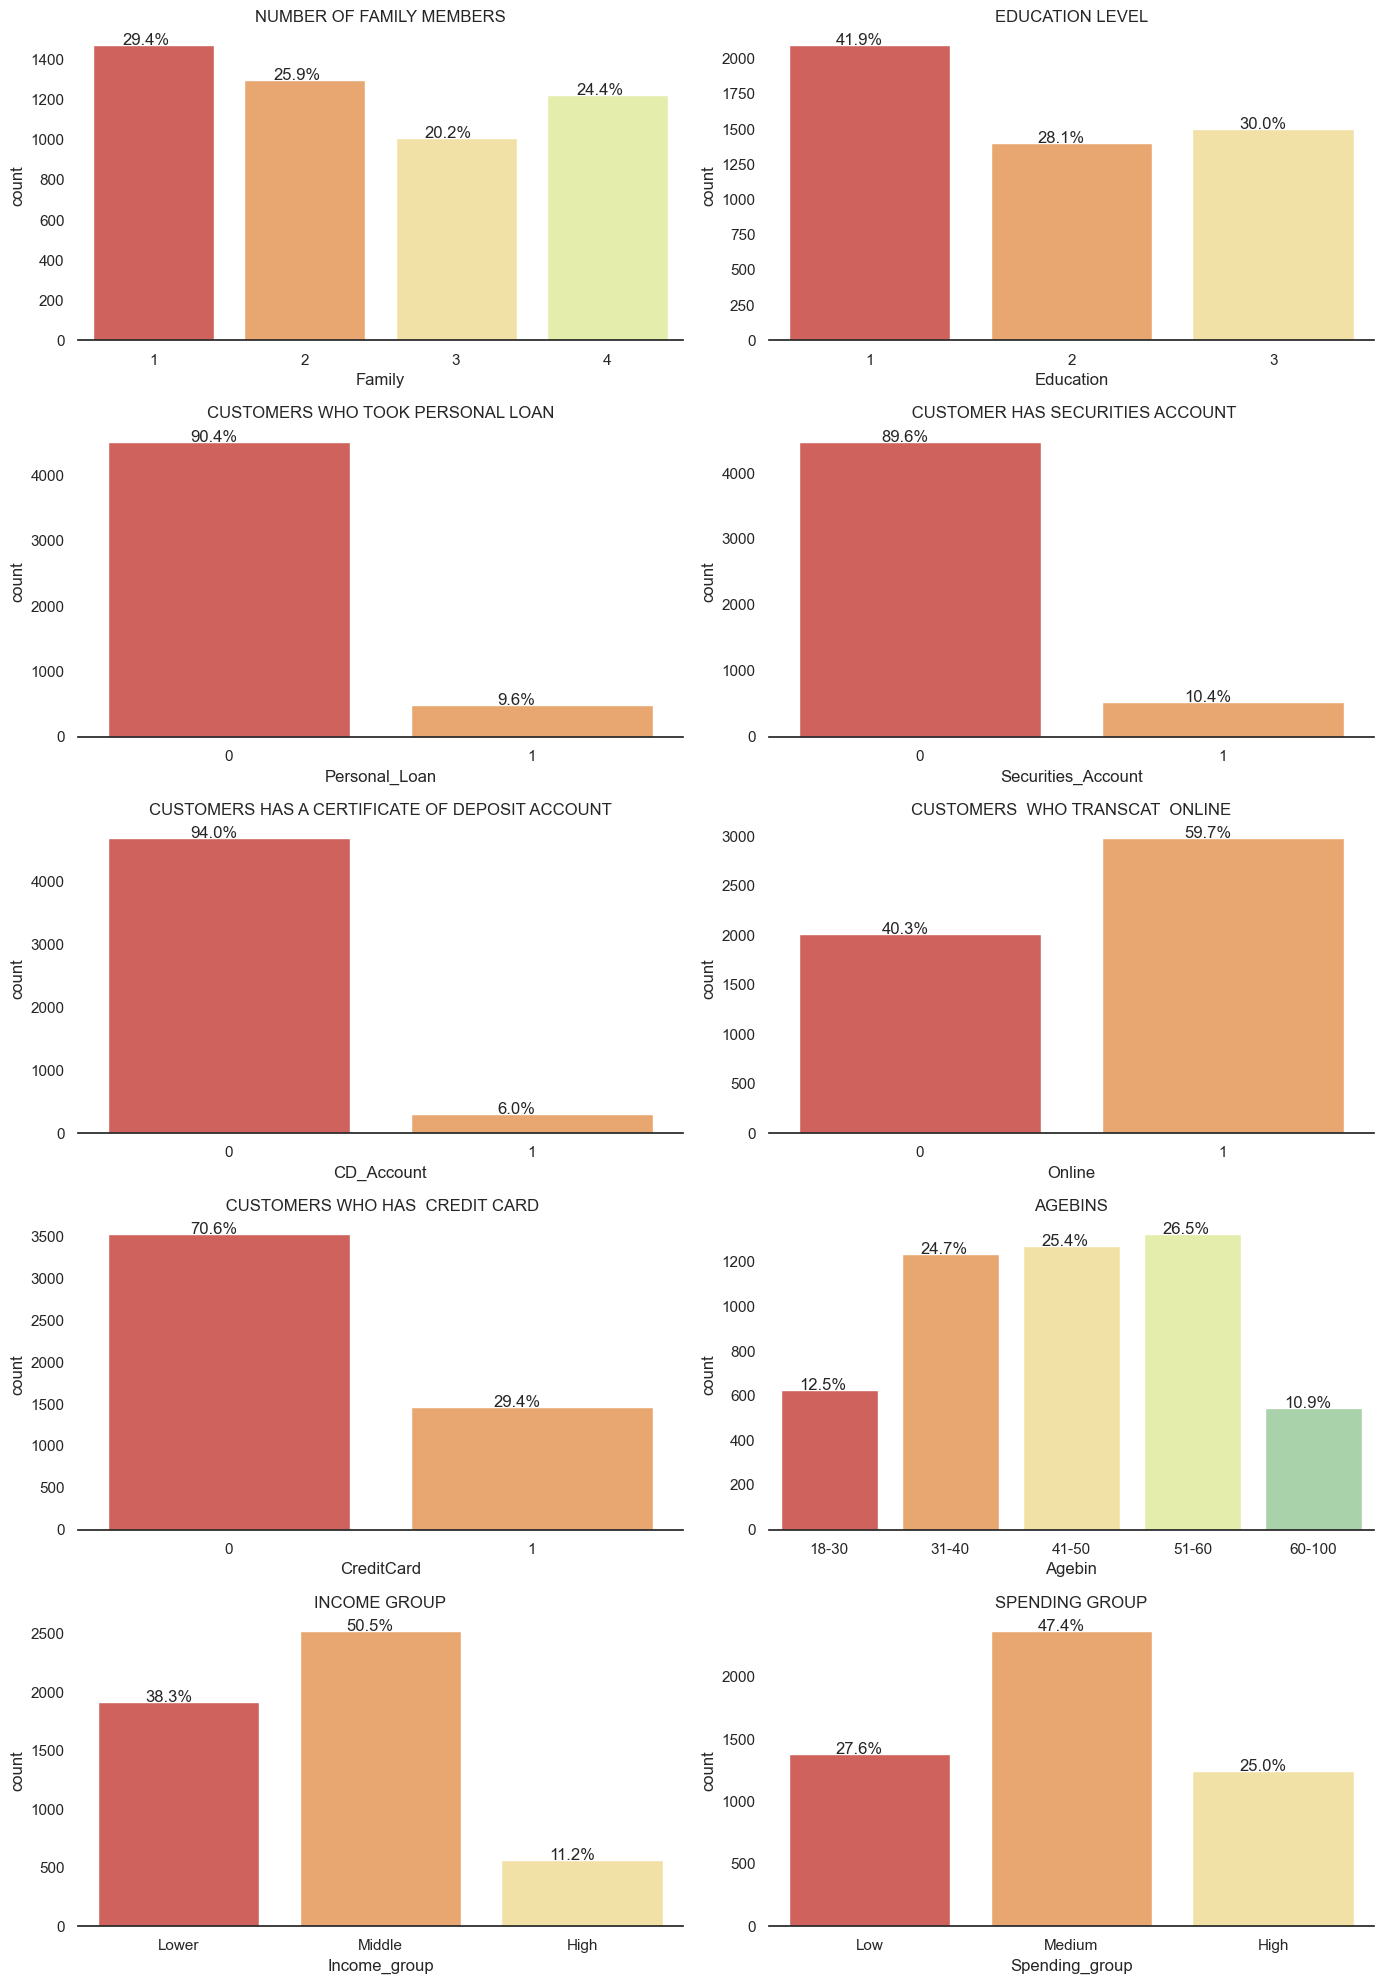

In [14]:
# create visualization
cat_columns = ['Family','Education','Personal_Loan','Securities_Account',
               'CD_Account','Online','CreditCard','Agebin','Income_group','Spending_group']
title=['Number of Family Members','Education Level','Customers who took Personal Loan',
       ' Customer has Securities Account','Customers has a Certificate of Deposit Account',
       'Customers  who transcat  Online',' Customers who has  Credit Card','Agebins',"Income group",'Spending group']
plt.figure(figsize=(14,20))

sns.set_theme(style="white")
for i, variable in enumerate(cat_columns):
                     plt.subplot(5,2,i+1)
                     order = df[variable].value_counts(ascending=False).index
                     sns.set_palette('Spectral')
                     ax=sns.countplot(x=df[variable], data=df )
                     sns.despine(top=True,right=True,left=True)
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(df[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.tight_layout()
                     plt.title(title[i].upper())

Observations

Marital Status: Approximately 29.4% of the customers are single.

Education: Around 41.9% of the customers have an undergraduate level of education.

Personal Loan: Approximately 9.6% of the customers have purchased a personal loan from the bank.

Securities Account: About 10.4% of the customers have a securities account with the bank.

CD Account: Around 6% of the customers have a certificate of deposit (CD) account.

Online Transactions: 60% of the customers engage in online transactions.

Credit Cards: Approximately 29.4% of the customers have credit cards.

Age Group: Around 75% of the customers fall within the age range of 31 to 60, suggesting that the majority of customers are in their middle-aged years.

Income Group: Approximately 50% of the bank's customers belong to the middle-income group.

Average Spending: About 48% of the customers have a medium level of average spending.

# Bivariate Analysis

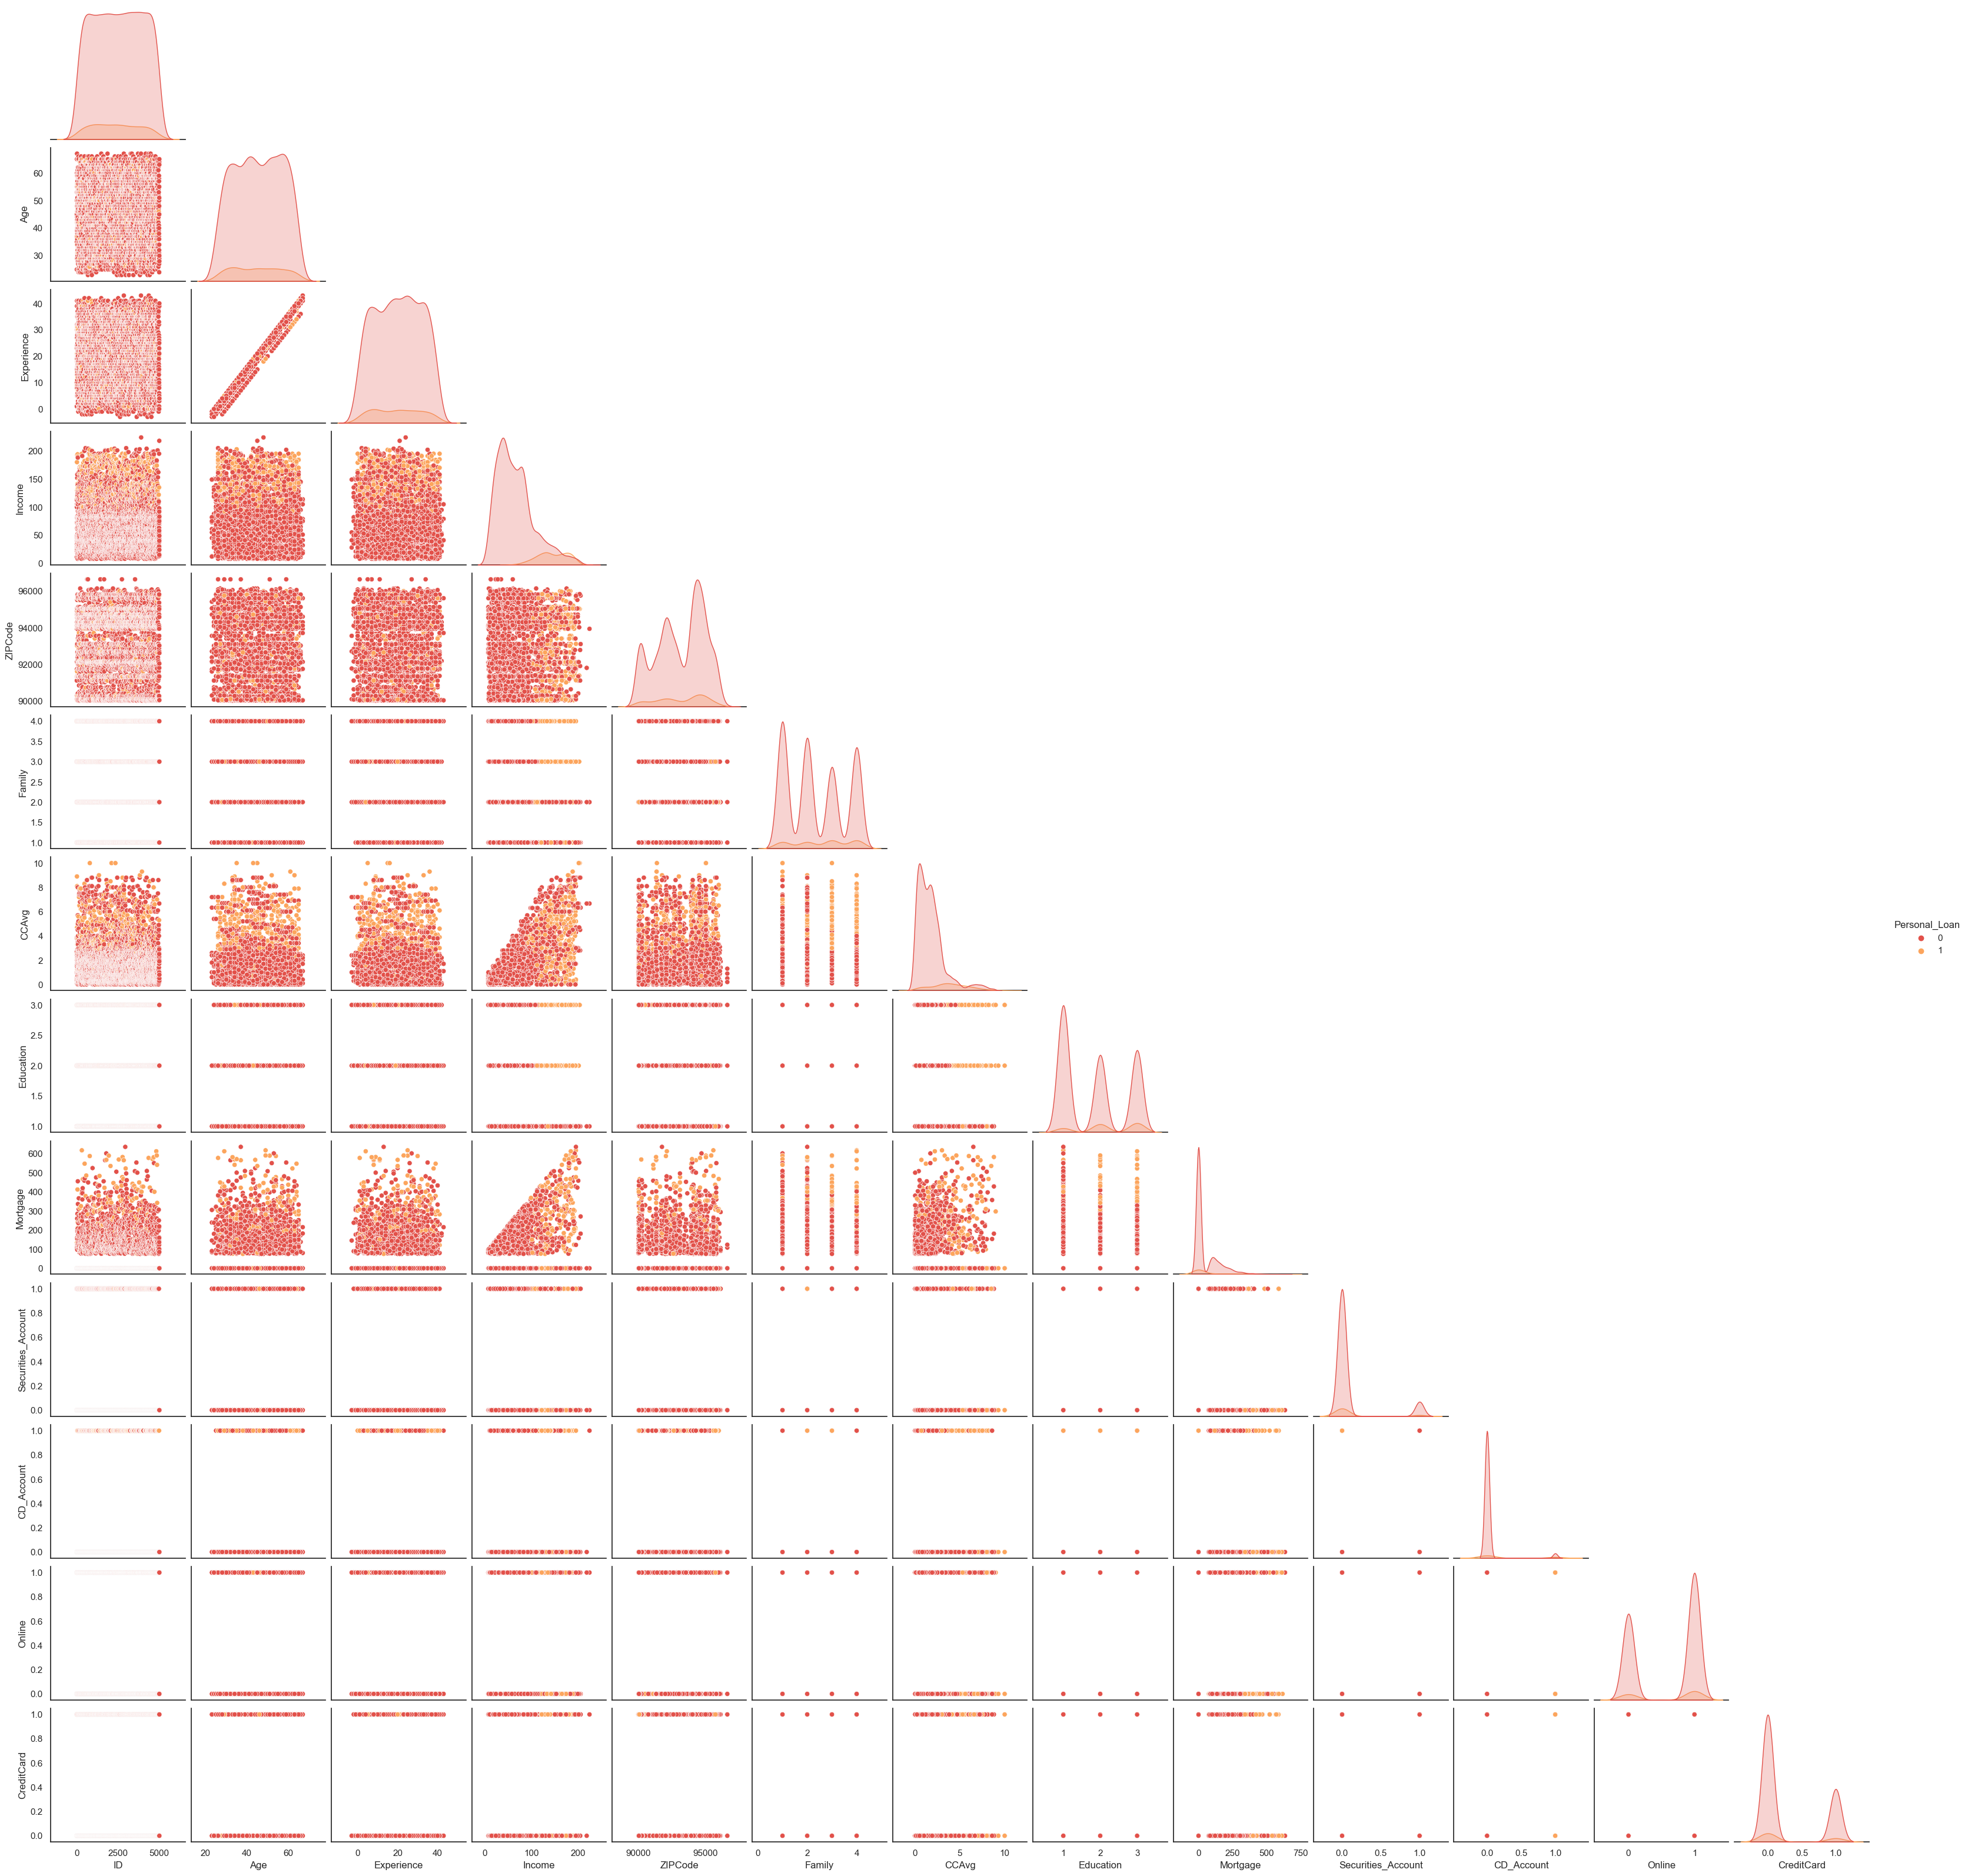

In [16]:
sns.pairplot(df, hue="Personal_Loan",corner=True)
plt.show()

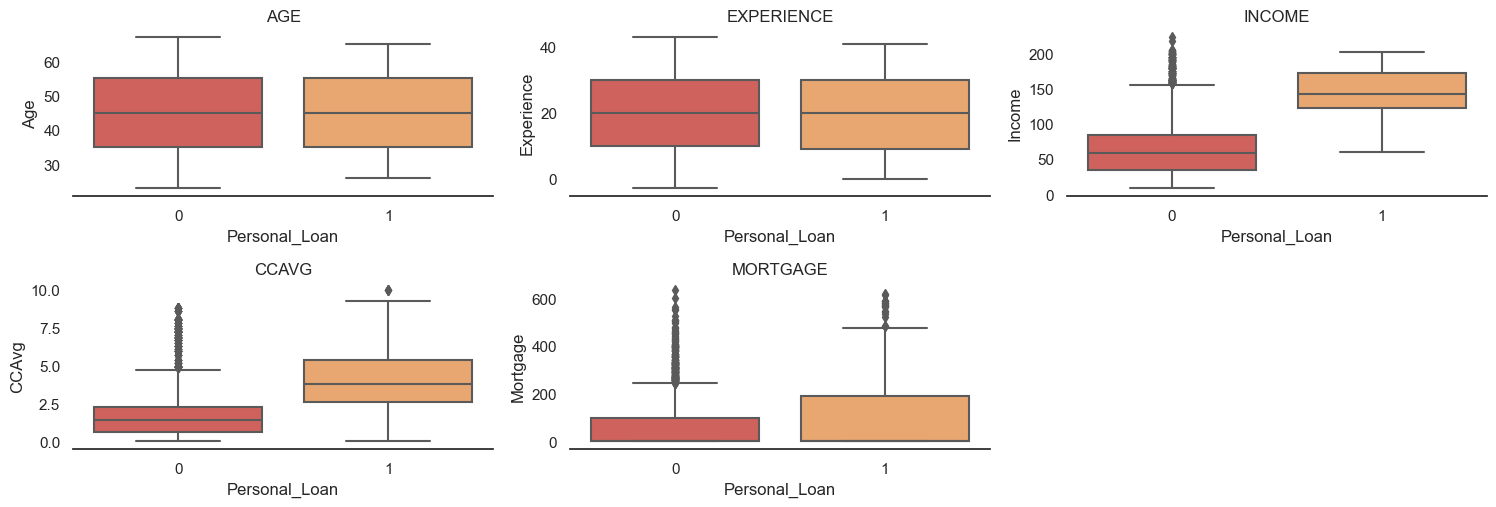

In [17]:
numeric_columns = ['Age','Experience','Income','CCAvg','Mortgage']
plt.figure(figsize=(15,25))
for i, variable in enumerate(numeric_columns):
        plt.subplot(10,3,i+1)
        sns.boxplot(x='Personal_Loan',y= df[variable], data=df)
        sns.despine(top=True,right=True,left=True)
        plt.tight_layout()
        plt.title(variable.upper())

<Axes: xlabel='CCAvg', ylabel='Density'>

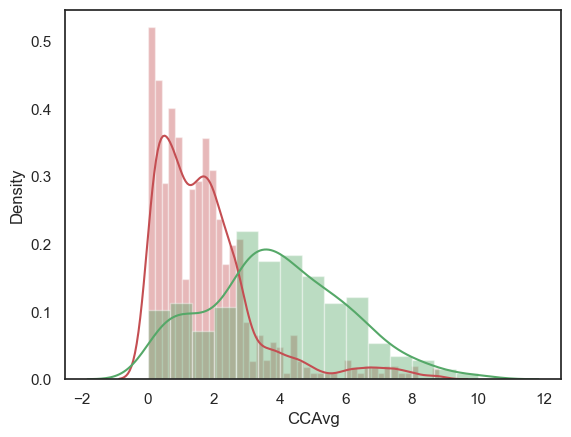

In [18]:
sns.distplot( df[df['Personal_Loan'] == 0]['CCAvg'], color = 'r')
sns.distplot( df[df['Personal_Loan'] == 1]['CCAvg'], color = 'g')

<Axes: xlabel='Income', ylabel='Density'>

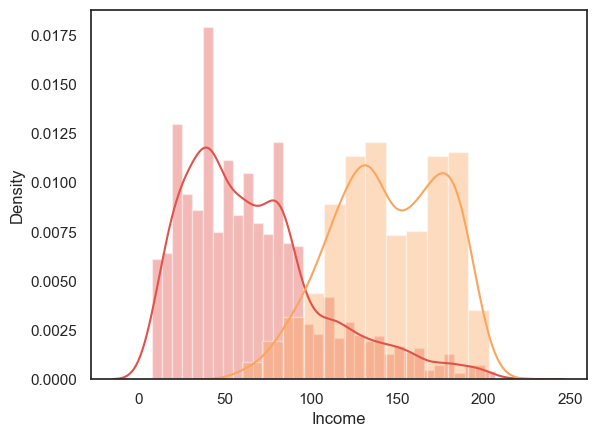

In [19]:
sns.distplot( df[df['Personal_Loan'] == 0]['Income'])
sns.distplot( df[df['Personal_Loan'] == 1]['Income'])

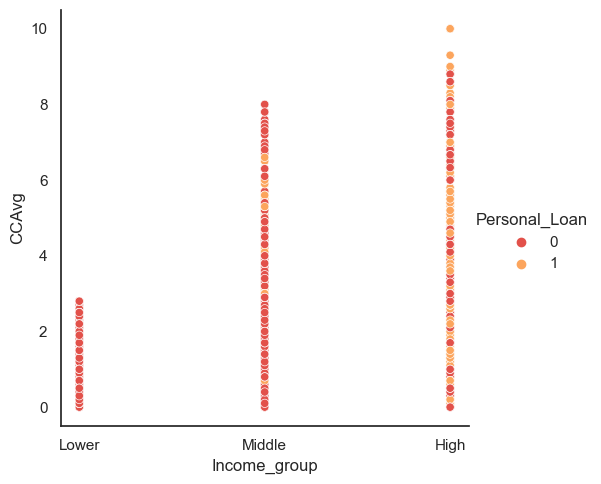

In [20]:
sns.relplot(x='Income_group',y='CCAvg',hue='Personal_Loan',data=df)

<Axes: xlabel='Mortgage', ylabel='Density'>

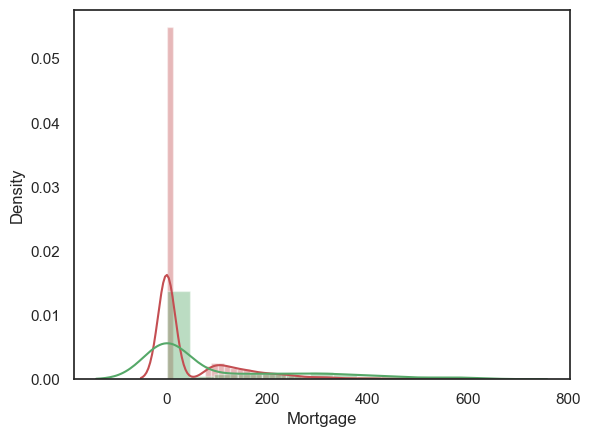

In [21]:
sns.distplot( df[df['Personal_Loan'] == 0]['Mortgage'], color = 'r')
sns.distplot( df[df['Personal_Loan'] == 1]['Mortgage'], color = 'g')

<Axes: xlabel='Income_group', ylabel='count'>

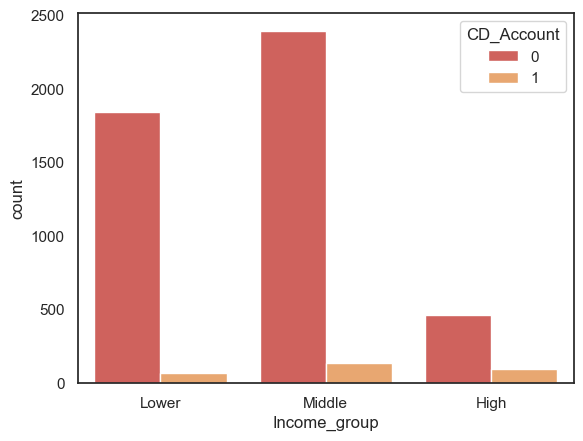

In [22]:
sns.countplot(x='Income_group',hue='CD_Account',data=df)

<Axes: xlabel='Age', ylabel='Density'>

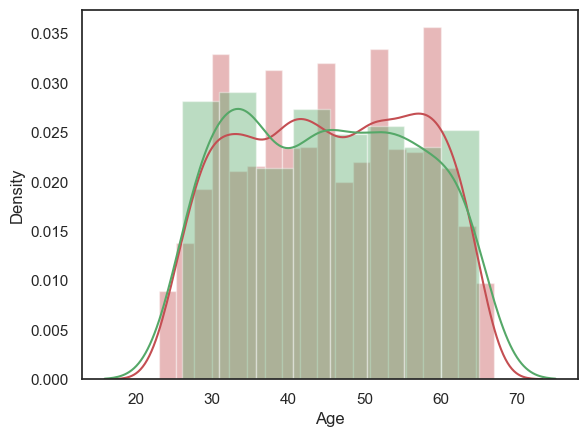

In [23]:
sns.distplot( df[df['Personal_Loan'] == 0]['Age'], color = 'r')
sns.distplot( df[df['Personal_Loan'] == 1]['Age'], color = 'g')

<Axes: xlabel='Spending_group', ylabel='count'>

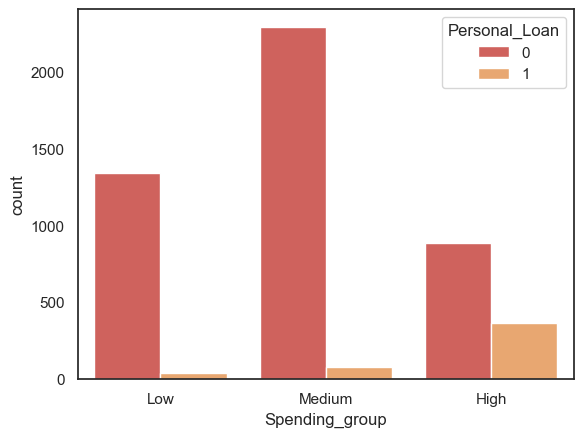

In [24]:
sns.countplot(x='Spending_group',hue='Personal_Loan',data=df)

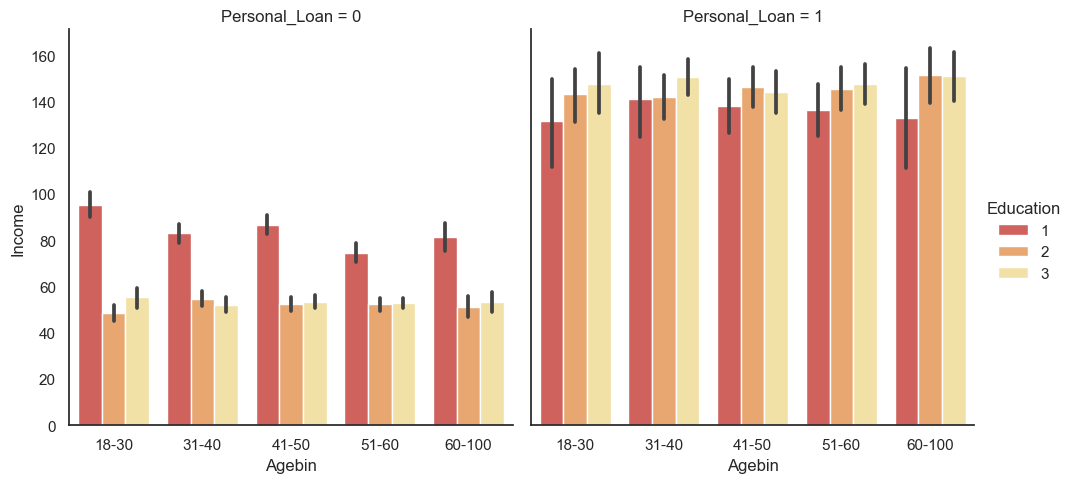

In [25]:
sns.catplot(y='Income',x='Agebin',hue='Education',kind='bar',col="Personal_Loan", data=df)


Observations

Family Size and Borrowed Loans: The number of customers with a family size of 3 who have borrowed loans from the bank is greater compared to customers with other family sizes. This indicates that customers with a family size of 3 are more likely to take out loans from the bank.

Personal Loan and Securities Account: Out of those who had a personal loan with the bank, 60% of them also had a securities account. This suggests a positive relationship between having a personal loan and holding a securities account.

Certificate of Deposit and Previous Loan: Customers who had a certificate of deposit (CD) with the bank had previously borrowed a loan. This indicates a connection between holding a CD account and having a history of borrowing loans.

Online Facility Usage and Personal Loan: The use of online facilities by customers does not appear to have an impact on whether or not they have a personal loan. The two variables seem to be independent of each other.

Personal Loan and Credit Card Usage: The majority of customers who had a personal loan with the bank did not use credit cards from other banks. This suggests that having a personal loan does not necessarily correlate with using credit cards from external sources.

Income and Personal Loan: People with higher incomes tend to opt for personal loans more frequently. This suggests that individuals with higher financial resources are more likely to seek loans from the bank.

Mortgage and Loan: Customers with high mortgage amounts are more inclined to opt for a loan. This indicates that individuals with larger mortgage obligations may have a greater need for additional financial support through loans.

Average Monthly Credit Usage and Loan: Customers with higher average monthly credit card usage are more likely to have opted for a loan. This implies that individuals who regularly utilize their credit cards for higher amounts may also require additional financial assistance through loans.

Income, Average Credit Card Usage, and Mortgage: Customers with higher incomes tend to have higher average credit card usage and larger mortgages. This suggests a positive correlation between income and both credit card usage and mortgage amounts. Higher income individuals may have more financial flexibility to utilize credit cards and secure larger mortgages.

Education and Credit Card Usage/Loan: Graduate and Advanced/Professional degree holders exhibit higher monthly credit card usage and are more likely to have borrowed loans from the bank. This indicates that individuals with higher educational qualifications may have higher financial needs or may be more financially active, utilizing credit cards and seeking loans.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [26]:
df.head()

ID  Age  Experience  Income  ZIPCode  Family   CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4 1.60000          1         0   
1   2   45          19      34    90089       3 1.50000          1         0   
2   3   39          15      11    94720       1 1.00000          1         0   
3   4   35           9     100    94112       1 2.70000          2         0   
4   5   35           8      45    91330       4 1.00000          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard Agebin  \
0              0                   1           0       0           0  18-30   
1              0                   1           0       0           0  41-50   
2              0                   0           0       0           0  31-40   
3              0                   0           0       0           0  31-40   
4              0                   0           0       0           1  31-40   

  Income_group Spending_group  
0        Lower         Medium  
1        Lower         Medium  
2        Lower         Medium  
3       Middle           High  
4        Lower         Medium

Zip Code Treatment

Reducing the number of categories for a categorical feature like the "Zipcode" can be beneficial in certain cases, especially when the feature has a large number of unique values. By reducing the categories, you can simplify the feature and potentially improve the efficiency and interpretability of your analysis or predictive model. Here are a few approaches you can consider for reducing the categories of the "Zipcode" feature like Aggregating Zipcodes etc

In [27]:
!pip install zipcodes # installing Zipcodes library .

  Obtaining dependency information for zipcodes from https://files.pythonhosted.org/packages/1e/4a/d0e54c2eaed40f604e9667311a7b86dfb82cb2e504aaba25eb2412938073/zipcodes-1.2.0-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.6/719.6 kB 8.4 MB/s eta 0:00:00:00:010:01


In [28]:
import zipcodes as zcode # to get zipcodes

In [29]:
zipcode_list=df.ZIPCode.unique()

Create zipe and county mapping and add a column for county

In [30]:
dict_zip={}
for zipcode in zipcode_list:
    city_county = zcode.matching(zipcode.astype('str'))
    if len(city_county)==1:
        county=city_county[0].get('county')
    else:
        county=zipcode

    dict_zip.update({zipcode:county})

In [31]:
df['County']=df['ZIPCode'].map(dict_zip)

In [32]:
#dict_zip

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIPCode             5000 non-null   int64   
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   int64   
 8   Mortgage            5000 non-null   int64   
 9   Personal_Loan       5000 non-null   int64   
 10  Securities_Account  5000 non-null   int64   
 11  CD_Account          5000 non-null   int64   
 12  Online              5000 non-null   int64   
 13  CreditCard          5000 non-null   int64   
 14  Agebin              5000 non-null   category
 15  Income_group        5000 non-null   ca

Convert county to region

In [34]:

counties = {
'Los Angeles County':'Los Angeles Region',
'San Diego County':'Southern',
'Santa Clara County':'Bay Area',
'Alameda County':'Bay Area',
'Orange County':'Southern',
'San Francisco County':'Bay Area',
'San Mateo County':'Bay Area',
'Sacramento County':'Central',
'Santa Barbara County':'Southern',
'Yolo County':'Central',
'Monterey County':'Bay Area',
'Ventura County':'Southern',
'San Bernardino County':'Southern',
'Contra Costa County':'Bay Area',
'Santa Cruz County':'Bay Area',
'Riverside County':'Southern',
'Kern County':'Southern',
'Marin County':'Bay Area',
'San Luis Obispo County':'Southern',
'Solano County':'Bay Area',
'Humboldt County':'Superior',
'Sonoma County':'Bay Area',
'Fresno County':'Central',
'Placer County':'Central',
'Butte County':'Superior',
'Shasta County':'Superior',
'El Dorado County':'Central',
'Stanislaus County':'Central',
'San Benito County':'Bay Area',
'San Joaquin County':'Central',
'Mendocino County':'Superior',
'Tuolumne County':'Central',
'Siskiyou County':'Superior',
'Trinity County':'Superior',
'Merced County':'Central',
'Lake County':'Superior',
'Napa County':'Bay Area',
'Imperial County':'Southern',
93077:'Southern',
96651:'Bay Area'
}

In [35]:
df['Regions'] = df['County'].map(counties)

In [36]:
df.head()

ID  Age  Experience  Income  ZIPCode  Family   CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4 1.60000          1         0   
1   2   45          19      34    90089       3 1.50000          1         0   
2   3   39          15      11    94720       1 1.00000          1         0   
3   4   35           9     100    94112       1 2.70000          2         0   
4   5   35           8      45    91330       4 1.00000          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard Agebin  \
0              0                   1           0       0           0  18-30   
1              0                   1           0       0           0  41-50   
2              0                   0           0       0           0  31-40   
3              0                   0           0       0           0  31-40   
4              0                   0           0       0           1  31-40   

  Income_group Spending_group                County             Regions  
0        Lower         Medium    Los Angeles County  Los Angeles Region  
1        Lower         Medium    Los Angeles County  Los Angeles Region  
2        Lower         Medium        Alameda County            Bay Area  
3       Middle           High  San Francisco County            Bay Area  
4        Lower         Medium    Los Angeles County  Los Angeles Region

In [37]:
print(df['County'].value_counts())

County
Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              339
San Francisco County       257
San Mateo County           204
Sacramento County          184
Santa Barbara County       154
Yolo County                130
Monterey County            128
Ventura County             114
San Bernardino County      101
Contra Costa County         85
Santa Cruz County           68
Riverside County            56
Kern County                 54
Marin County                54
Solano County               33
San Luis Obispo County      33
Humboldt County             32
Sonoma County               28
Fresno County               26
Placer County               24
92717                       22
Butte County                19
Shasta County               18
El Dorado County            17
Stanislaus County           15
San Benito County           14
San Joaquin County          13
Mendocino County             8
T

Fix Data Types

Change data trypes to categorical values for attributes

In [38]:
category_col = ['Personal_Loan', 'Securities_Account','Family', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode', 'Education','County']
df[category_col] = df[category_col].astype('category')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIPCode             5000 non-null   category
 5   Family              5000 non-null   category
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal_Loan       5000 non-null   category
 10  Securities_Account  5000 non-null   category
 11  CD_Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
 14  Agebin              5000 non-null   category
 15  Income_group        5000 non-null   ca

Fix Experience attribute

experience had negative values, we can fix them to absolute vaues

In [40]:
df[df['Experience']<0]['Age'].describe()

count   52.00000
mean    24.51923
std      1.47516
min     23.00000
25%     24.00000
50%     24.00000
75%     25.00000
max     29.00000
Name: Age, dtype: float64

In [41]:
df[df['Experience']<0].sort_values(by='Experience',ascending=True)

ID  Age  Experience  Income ZIPCode Family   CCAvg Education  \
4514  4515   24          -3      41   91768      4 1.00000         3   
2618  2619   23          -3      55   92704      3 2.40000         2   
4285  4286   23          -3     149   93555      2 7.20000         1   
3626  3627   24          -3      28   90089      4 1.00000         3   
2717  2718   23          -2      45   95422      4 0.60000         2   
2876  2877   24          -2      80   91107      2 1.60000         3   
3130  3131   23          -2      82   92152      2 1.80000         2   
2466  2467   24          -2      80   94105      2 1.60000         3   
3796  3797   24          -2      50   94920      3 2.40000         2   
2962  2963   23          -2      81   91711      2 1.80000         2   
793    794   24          -2     150   94720      2 2.00000         1   
3887  3888   24          -2     118   92634      2 7.20000         1   
889    890   24          -2      82   91103      2 1.60000         3   
597    598   24          -2     125   92835      2 7.20000         1   
315    316   24          -2      51   90630      3 0.30000         3   
451    452   28          -2      48   94132      2 1.75000         3   
4116  4117   24          -2     135   90065      2 7.20000         1   
4481  4482   25          -2      35   95045      4 1.00000         3   
4411  4412   23          -2      75   90291      2 1.80000         2   
4015  4016   25          -1     139   93106      2 2.00000         1   
3157  3158   23          -1      13   94720      4 1.00000         1   
3279  3280   26          -1      44   94901      1 2.00000         2   
3284  3285   25          -1     101   95819      4 2.10000         3   
3292  3293   25          -1      13   95616      4 0.40000         1   
3394  3395   25          -1     113   90089      4 2.10000         3   
3425  3426   23          -1      12   91605      4 1.00000         1   
4088  4089   29          -1      71   94801      2 1.75000         3   
3824  3825   23          -1      12   95064      4 1.00000         1   
3946  3947   25          -1      40   93117      3 2.40000         2   
3076  3077   29          -1      62   92672      2 1.75000         3   
89      90   25          -1     113   94303      4 2.30000         3   
2848  2849   24          -1      78   94720      2 1.80000         2   
226    227   24          -1      39   94085      2 1.70000         2   
524    525   24          -1      75   93014      4 0.20000         1   
536    537   25          -1      43   92173      3 2.40000         2   
540    541   25          -1     109   94010      4 2.30000         3   
576    577   25          -1      48   92870      3 0.30000         3   
583    584   24          -1      38   95045      2 1.70000         2   
649    650   25          -1      82   92677      4 2.10000         3   
670    671   23          -1      61   92374      4 2.60000         1   
2980  2981   25          -1      53   94305      3 2.40000         2   
686    687   24          -1      38   92612      4 0.60000         2   
1173  1174   24          -1      35   94305      2 1.70000         2   
1428  1429   25          -1      21   94583      4 0.40000         1   
1522  1523   25          -1     101   94720      4 2.30000         3   
1905  1906   25          -1     112   92507      2 2.00000         1   
2102  2103   25          -1      81   92647      2 1.60000         3   
2430  2431   23          -1      73   92120      4 2.60000         1   
2545  2546   25          -1      39   94720      3 2.40000         2   
4582  4583   25          -1      69   92691      3 0.30000         3   
909    910   23          -1     149   91709      1 6.33000         1   
4957  4958   29          -1      50   95842      2 1.75000         3   

      Mortgage Personal_Loan Securities_Account CD_Account Online CreditCard  \
4514         0             0                  0          0      1          0   
2618       145             0   

In [42]:
df.loc[df['Experience']<0,'Experience']=np.abs(df['Experience'])

In [43]:
df[df['Experience']==0]['Age'].describe()

count   66.00000
mean    25.63636
std      1.14538
min     24.00000
25%     25.00000
50%     26.00000
75%     26.00000
max     30.00000
Name: Age, dtype: float64

Outliers detection and treatment

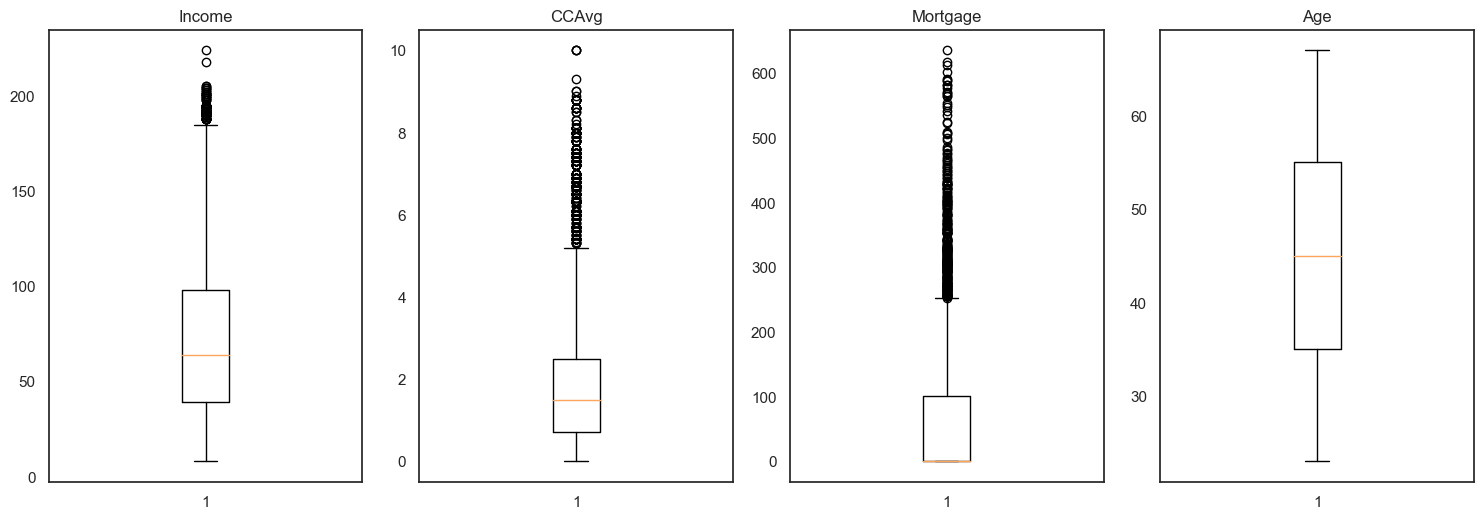

In [44]:
columns =['Income','CCAvg','Mortgage','Age']

plt.figure(figsize=(15,20))

for i, variable in enumerate(columns):
                     plt.subplot(4,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

In [45]:
df.sort_values(by=["Income"],ascending = False).head(5)

ID  Age  Experience  Income ZIPCode Family   CCAvg Education  \
3896  3897   48          24     224   93940      2 6.67000         1   
4993  4994   45          21     218   91801      2 6.67000         1   
526    527   26           2     205   93106      1 6.33000         1   
2988  2989   46          21     205   95762      2 8.80000         1   
4225  4226   43          18     204   91902      2 8.80000         1   

      Mortgage Personal_Loan Securities_Account CD_Account Online CreditCard  \
3896         0             0                  0          1      1          1   
4993         0             0                  0          0      1          0   
526        271             0                  0          0      0          1   
2988       181             0                  1          0      1          0   
4225         0             0                  0          0      1          0   

     Agebin Income_group Spending_group                County  \
3896  41-50         High           High       Monterey County   
4993  41-50         High           High    Los Angeles County   
526   18-30         High           High  Santa Barbara County   
2988  41-50         High           High      El Dorado County   
4225  41-50         High           High      San Diego County   

                 Regions  
3896            Bay Area  
4993  Los Angeles Region  
526             Southern  
2988             Central  
4225            Southern

There are outliers but they might be a real case scenarios, so wont treat them.

Exclude columns not needed for model training

In [46]:
df.drop(columns=["Agebin", "ZIPCode","County",'Experience','Income_group','Spending_group'], inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   Family              5000 non-null   category
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   category
 6   Mortgage            5000 non-null   int64   
 7   Personal_Loan       5000 non-null   category
 8   Securities_Account  5000 non-null   category
 9   CD_Account          5000 non-null   category
 10  Online              5000 non-null   category
 11  CreditCard          5000 non-null   category
 12  Regions             4973 non-null   object  
dtypes: category(7), float64(1), int64(4), object(1)
memory usage: 269.6+ KB


Do hot encoding of attributes

In [48]:
oneHotCols=['Regions','Education']
df=pd.get_dummies(df,columns=oneHotCols,drop_first=True)

## Model Building

### Model Evaluation Criterion

In the context of predicting whether a customer will take a personal loan, two types of predictive errors can occur, which are significant in different ways:

False Positive (Type I Error): This occurs when our model predicts that a customer will take a personal loan, but in reality, they do not. This kind of error leads to a loss of resources, as the bank might invest time and effort in targeting these customers with marketing materials, special offers, or personalized assistance, all of which goes to waste.

False Negative (Type II Error): This happens when our model predicts that a customer will not take a personal loan, but in reality, they do. This error leads to a loss of opportunity, as these customers might have responded positively if they had been targeted with marketing efforts. The bank misses out on potential business by not reaching out to these customers.

In our efforts to predict whether a customer will take a personal loan, our primary focus is on the minimization of missed opportunities, characterized as False Negatives (Type II Error). This error occurs when our model predicts that a customer will not take a personal loan, but in reality, they were likely to do so.

These situations represent a significant loss of opportunity. The potential customer, fully prepared to engage with our services, is overlooked by the sales and marketing teams who rely on the model's predictions. This not only results in loss of immediate business but also the potential long-term value and loyalty that customer could have brought to our financial institution.

Therefore, while maintaining the balance of predictive accuracy, our priority is to optimize the model in a way that it significantly reduces the chance of these missed opportunities. This approach will ensure that our marketing efforts are more effectively targeted, potentially increasing conversion rates and customer acquisition for our personal loan product.

In this scenario, the appropriate performance metric for the model is Recall (also known as Sensitivity or True Positive Rate). Recall measures the proportion of actual positives that are correctly identified as such. In other words, it quantifies the model’s ability to find all the potential loan customers. A higher recall means fewer chances of False Negatives, thus reducing the chances of missing out on potential customers.

We will also look for accuracy of the model as well.

Hence, our objective is to maximize Recall in order to increase the chances of correctly identifying potential customers from both classes, thereby reducing the loss of opportunity


### Model Building

In [49]:
from sklearn.preprocessing import StandardScaler
target_col = ["Personal_Loan"]
col_names = list(df.columns)
std = StandardScaler()

col_names = list(df.columns)
col_names.remove("Personal_Loan")

scaled = std.fit_transform(df[col_names])
scaled = pd.DataFrame(scaled, columns=col_names)

df = pd.concat([scaled, df[target_col]], axis=1)

df.head()

ID      Age   Income   Family    CCAvg  Mortgage  Securities_Account  \
0 -1.73170 -1.77442 -0.53823  1.39741 -0.19339  -0.55552             2.92892   
1 -1.73101 -0.02952 -0.86411  0.52599 -0.25061  -0.55552             2.92892   
2 -1.73032 -0.55299 -1.36379 -1.21686 -0.53674  -0.55552            -0.34142   
3 -1.72963 -0.90197  0.56977 -1.21686  0.43609  -0.55552            -0.34142   
4 -1.72893 -0.90197 -0.62513  1.39741 -0.53674  -0.55552            -0.34142   

   CD_Account   Online  CreditCard  Regions_Central  \
0    -0.25354 -1.21662    -0.64531         -0.30283   
1    -0.25354 -1.21662    -0.64531         -0.30283   
2    -0.25354 -1.21662    -0.64531         -0.30283   
3    -0.25354 -1.21662    -0.64531         -0.30283   
4    -0.25354 -1.21662     1.54963         -0.30283   

   Regions_Los Angeles Region  Regions_Southern  Regions_Superior  \
0                     1.88844          -0.63073          -0.13691   
1                     1.88844          -0.63073          -0.13691   
2                    -0.52954          -0.63073          -0.13691   
3                    -0.52954          -0.63073          -0.13691   
4                     1.88844          -0.63073          -0.13691   

   Education_2  Education_3 Personal_Loan  
0     -0.62454     -0.65497             0  
1     -0.62454     -0.65497             0  
2     -0.62454     -0.65497             0  
3      1.60118     -0.65497             0  
4      1.60118     -0.65497             0

In [50]:
X = df[col_names]      # Contains the independent columns
y = df[target_col]     # Our target column

In [51]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 42)
train_y = train_y["Personal_Loan"]
test_y = test_y["Personal_Loan"]

In [52]:
conf_matrix_all = {}

def personal_loan_prediction(name, algo, training_x, testing_x, training_y, testing_y, plot) :
    algo.fit(training_x,training_y)
    predictions = algo.predict(testing_x)
    probabilities = algo.predict_proba(testing_x)
    conf_matrix = confusion_matrix(testing_y, predictions)
    tn, fp, fn, tp = conf_matrix.ravel()
    conf_matrix_all[name] = conf_matrix
    print("Classification report:")
    print(classification_report(testing_y, predictions))

    model_roc_auc = roc_auc_score(testing_y, predictions)
    fpr,tpr,thresholds = roc_curve(testing_y, probabilities[:,1])

    print ("Area under the curve: ", model_roc_auc)

    if plot:
        fig, axes = plt.subplots(1,2, figsize=(15, 5))
        conf_matrix = np.flip(conf_matrix)

        labels = np.array([['\nTP','\nFN'],['\nFP','\nTN']])
        labels = np.core.defchararray.add(conf_matrix.astype(str), labels)
        sns.heatmap(conf_matrix, fmt='', annot = labels, ax=axes[0], cmap="YlGnBu", xticklabels=[1, 0], yticklabels=[1, 0]);
        axes[0].set(xlabel='Predicted', ylabel='Actual')

        plt.title('Receiver Operating Characteristic')
        sns.lineplot(x=fpr, y=tpr, ax=axes[1])
        sns.lineplot()
        plt.plot([0, 1], [0, 1],'--')
        axes[1].set_xlim([0, 1])
        axes[1].set_ylim([0, 1])
        axes[1].set(xlabel = 'False Positive Rate', ylabel = 'True Positive Rate');
        plt.show();

# Logistic Regression

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1343
           1       0.89      0.68      0.77       157

    accuracy                           0.96      1500
   macro avg       0.93      0.83      0.87      1500
weighted avg       0.96      0.96      0.95      1500

Area under the curve:  0.8327397071865914


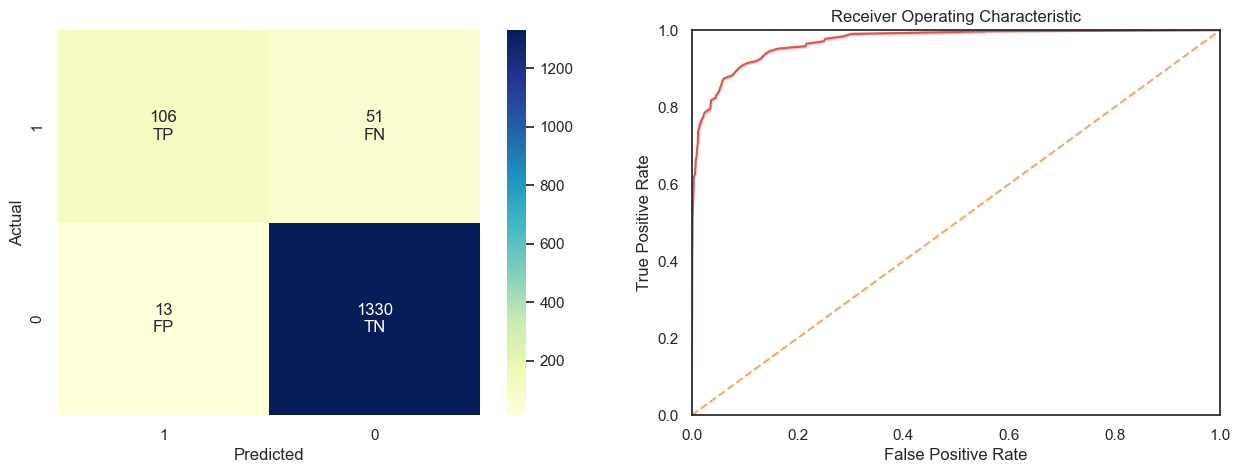

In [53]:
logReg  = LogisticRegression(C=0.4, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, penalty="l1", solver='liblinear')

personal_loan_prediction("Logistic Regression", logReg, train_X, test_X, train_y, test_y, plot = True)

In [54]:
logReg.fit(train_X, train_y)
y_test_pred_reg = logReg.predict(test_X)
y_train_pre_reg = logReg.predict(train_X)

In [55]:
result_logReg_test=pd.DataFrame(data=[accuracy_score(test_y, y_test_pred_reg),
                                precision_score(test_y, y_test_pred_reg, average='macro'),
                                recall_score(test_y, y_test_pred_reg, average='macro'),
                                f1_score(test_y, y_test_pred_reg, average='macro')],
                          index=['Accuracy','Precision','Recall','F1-score'],
                          columns = ['Logistic Regression Results - Test dataset'])
result_logReg_test

Logistic Regression Results - Test dataset
Accuracy                                      0.95733
Precision                                     0.92691
Recall                                        0.83274
F1-score                                      0.87231

In [56]:
result_logReg_train=pd.DataFrame(data=[accuracy_score(train_y, y_train_pre_reg),
                                precision_score(train_y, y_train_pre_reg, average='macro'),
                                recall_score(train_y, y_train_pre_reg, average='macro'),
                                f1_score(train_y, y_train_pre_reg, average='macro')],
                          index=['Accuracy','Precision','Recall','F1-score'],
                          columns = ['LogisticRegression Results - Train dataset'])
result_logReg_train

LogisticRegression Results - Train dataset
Accuracy                                      0.95743
Precision                                     0.91346
Recall                                        0.81524
F1-score                                      0.85610

# Decision Tree original

In [57]:
X_dt = df.drop('Personal_Loan', axis=1)
y_dt = df['Personal_Loan']

In [58]:
oneHotCols=X_dt.select_dtypes(exclude='number').columns.to_list()
X_dt=pd.get_dummies(X_dt,columns=oneHotCols,drop_first=True)
# Spliting data set
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.3, random_state=1, stratify=y_dt)

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1343
           1       0.87      0.89      0.88       157

    accuracy                           0.97      1500
   macro avg       0.93      0.93      0.93      1500
weighted avg       0.97      0.97      0.97      1500

Area under the curve:  0.9348568420353709


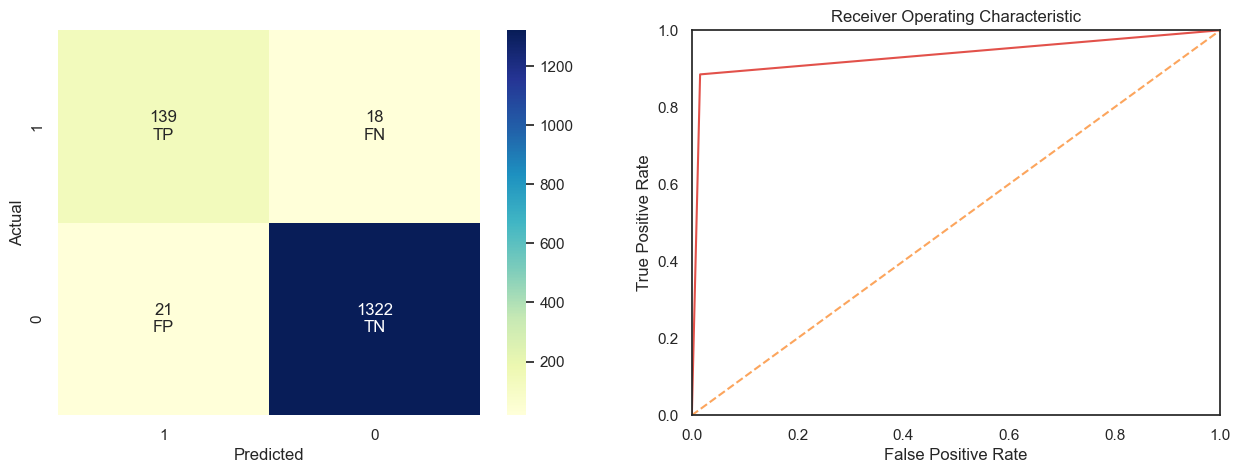

In [59]:
dtree_org = DecisionTreeClassifier(criterion = 'gini',class_weight={0:0.15,1:0.85}, random_state=1)
dtree_org.fit(train_X, train_y)
personal_loan_prediction("Decision Tree", dtree_org, train_X, test_X, train_y, test_y, plot=True)

y_pred_dtree_org = dtree_org.predict(test_X)

In [60]:
column_names = list(X_dt.columns)
feature_names = column_names
print(feature_names)

['ID', 'Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Regions_Central', 'Regions_Los Angeles Region', 'Regions_Southern', 'Regions_Superior', 'Education_2', 'Education_3']


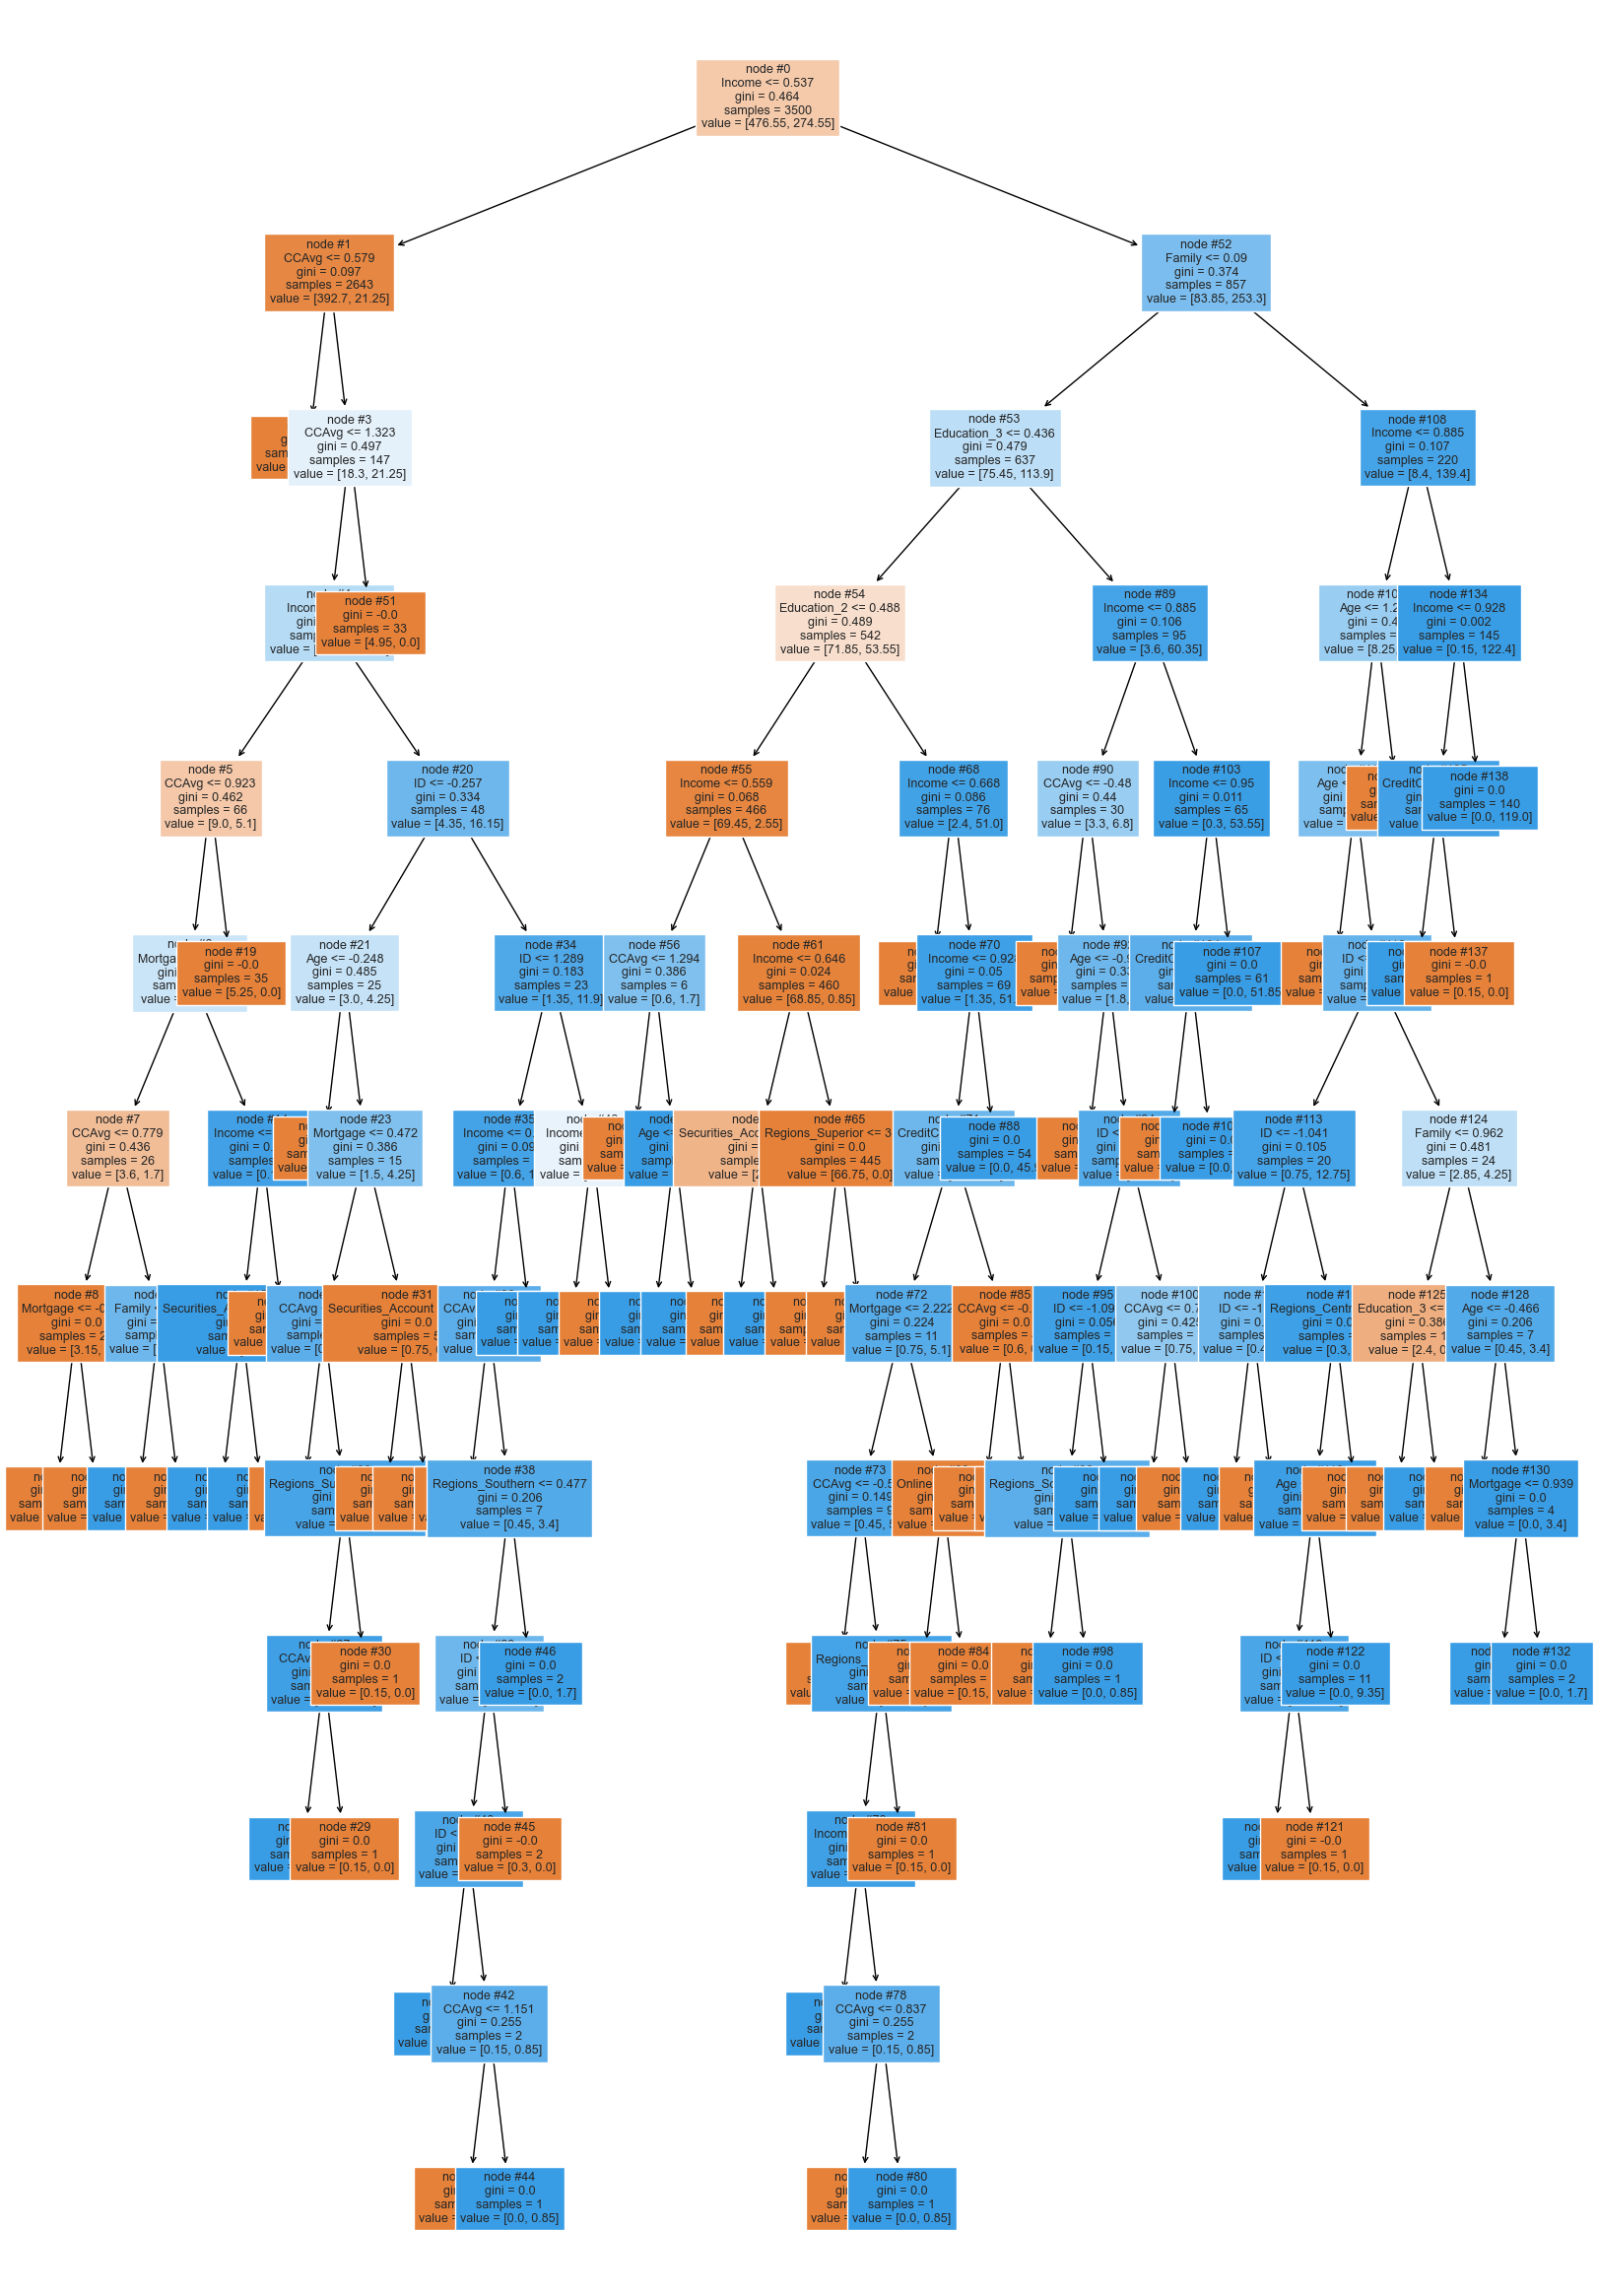

In [62]:
plt.figure(figsize=(20,30))
from sklearn import tree
from sklearn.model_selection import GridSearchCV
out = tree.plot_tree(dtree_org,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=None)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [63]:
dtree_org.fit(train_X, train_y)
y_test_pred_dtree_org = dtree_org.predict(test_X)
y_train_pred_dtree_org = dtree_org.predict(train_X)

In [64]:
result_dtree_org_test=pd.DataFrame(data=[accuracy_score(test_y, y_test_pred_dtree_org),
                                precision_score(test_y, y_test_pred_dtree_org, average='macro'),
                                recall_score(test_y, y_test_pred_dtree_org, average='macro'),
                                f1_score(test_y, y_test_pred_dtree_org, average='macro')],
                          index=['Accuracy','Precision','Recall','F1-score'],
                          columns = ['Decision tree Orginal Results - Test dataset'])
result_dtree_org_test

Decision tree Orginal Results - Test dataset
Accuracy                                        0.97400
Precision                                       0.92766
Recall                                          0.93486
F1-score                                        0.93122

In [65]:
result_dtree_org=pd.DataFrame(data=[accuracy_score(train_y, y_train_pred_dtree_org),
                                precision_score(train_y, y_train_pred_dtree_org, average='macro'),
                                recall_score(train_y, y_train_pred_dtree_org, average='macro'),
                                f1_score(train_y, y_train_pred_dtree_org, average='macro')],
                          index=['Accuracy','Precision','Recall','F1-score'],
                          columns = ['Decison Tree Original Results - Train dataset'])
result_dtree_org

Decison Tree Original Results - Train dataset
Accuracy                                         1.00000
Precision                                        1.00000
Recall                                           1.00000
F1-score                                         1.00000

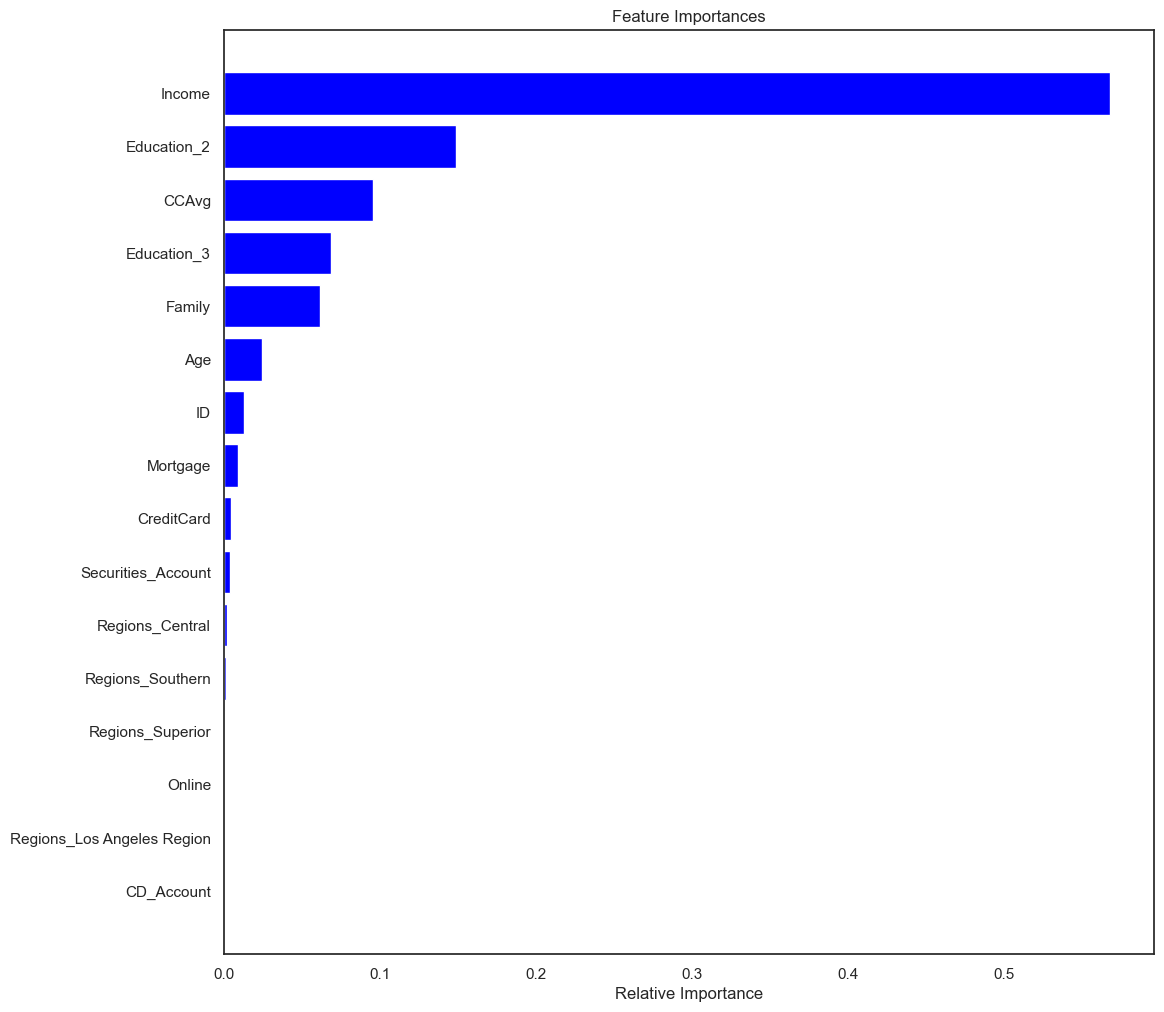

In [66]:
importances = dtree_org.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Decision Tree Pre-Prunning with Hyperparameter tuning of our tree model

Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. It is an exhaustive search that is performed on a the specific parameter values of a model. The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid. Let's see if we can improve our model performance even more.

In [67]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {'max_depth': np.arange(1,10),
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [5, 10,15,20,25,30],
              }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_dt, y_train_dt)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_
estimator

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=25, random_state=1)

In [68]:
# Fit the best algorithm to the data.
estimator.fit(X_train_dt, y_train_dt)
ytrain_predict_hp=estimator.predict(X_train_dt)
ytest_predict_hp=estimator.predict(X_test_dt)

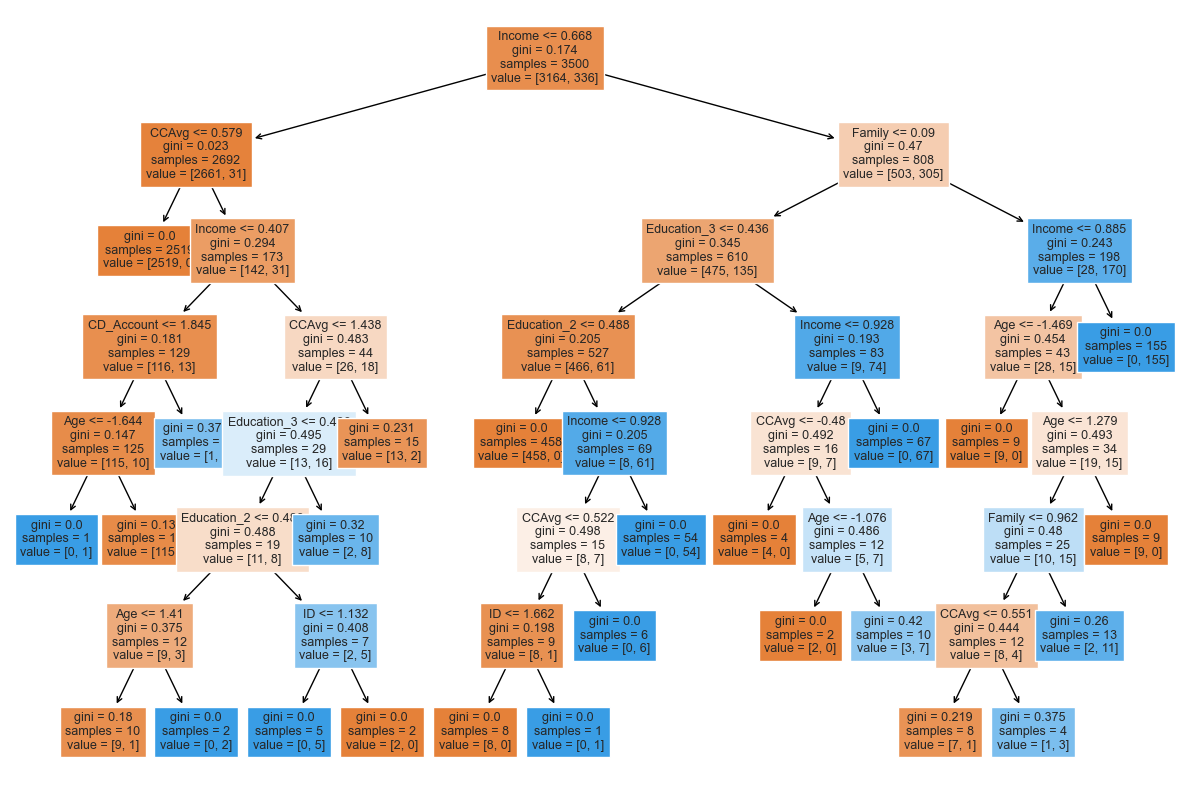

In [70]:
plt.figure(figsize=(15,10))

out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.93      0.90      0.92       157

    accuracy                           0.98      1500
   macro avg       0.96      0.95      0.95      1500
weighted avg       0.98      0.98      0.98      1500

Area under the curve:  0.9453215777966432


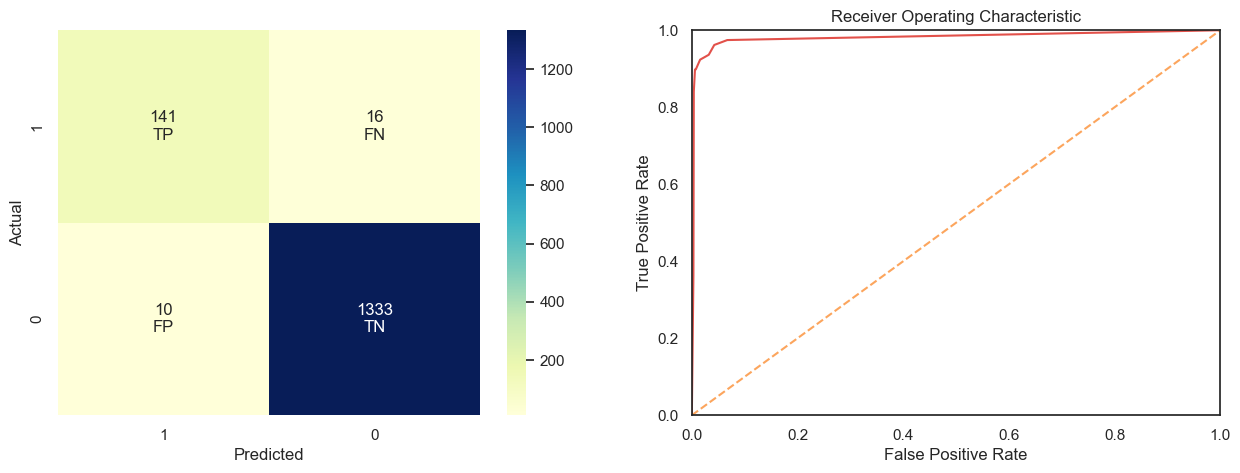

In [71]:
#get_recall_score(model)
personal_loan_prediction("Decision Tree", estimator, train_X, test_X, train_y, test_y, plot=True)

In [72]:
result_dtree_hparam_test=pd.DataFrame(data=[accuracy_score(test_y, ytest_predict_hp),
                                precision_score(test_y, ytest_predict_hp, average='macro'),
                                recall_score(test_y, ytest_predict_hp, average='macro'),
                                f1_score(test_y, ytest_predict_hp, average='macro')],
                          index=['Accuracy','Precision','Recall','F1-score'],
                          columns = ['Decision tree pre-prunning hyperparameter tuning Results - Test dataset'])
result_dtree_hparam_test

Decision tree pre-prunning hyperparameter tuning Results - Test dataset
Accuracy                                                                   0.82000
Precision                                                                  0.49060
Recall                                                                     0.49168
F1-score                                                                   0.49093

In [73]:
result_dtree_hparam_train = pd.DataFrame(data=[accuracy_score(train_y, ytrain_predict_hp),
                                precision_score(train_y, ytrain_predict_hp, average='macro'),
                                recall_score(train_y, ytrain_predict_hp, average='macro'),
                                f1_score(train_y, ytrain_predict_hp, average='macro')],
                          index=['Accuracy','Precision','Recall','F1-score'],
                          columns = ['Decison Tree pre-prunning hyperparameter Results - Train dataset'])
result_dtree_hparam_train

Decison Tree pre-prunning hyperparameter Results - Train dataset
Accuracy                                                            0.82771
Precision                                                           0.49228
Recall                                                              0.49209
F1-score                                                            0.49218

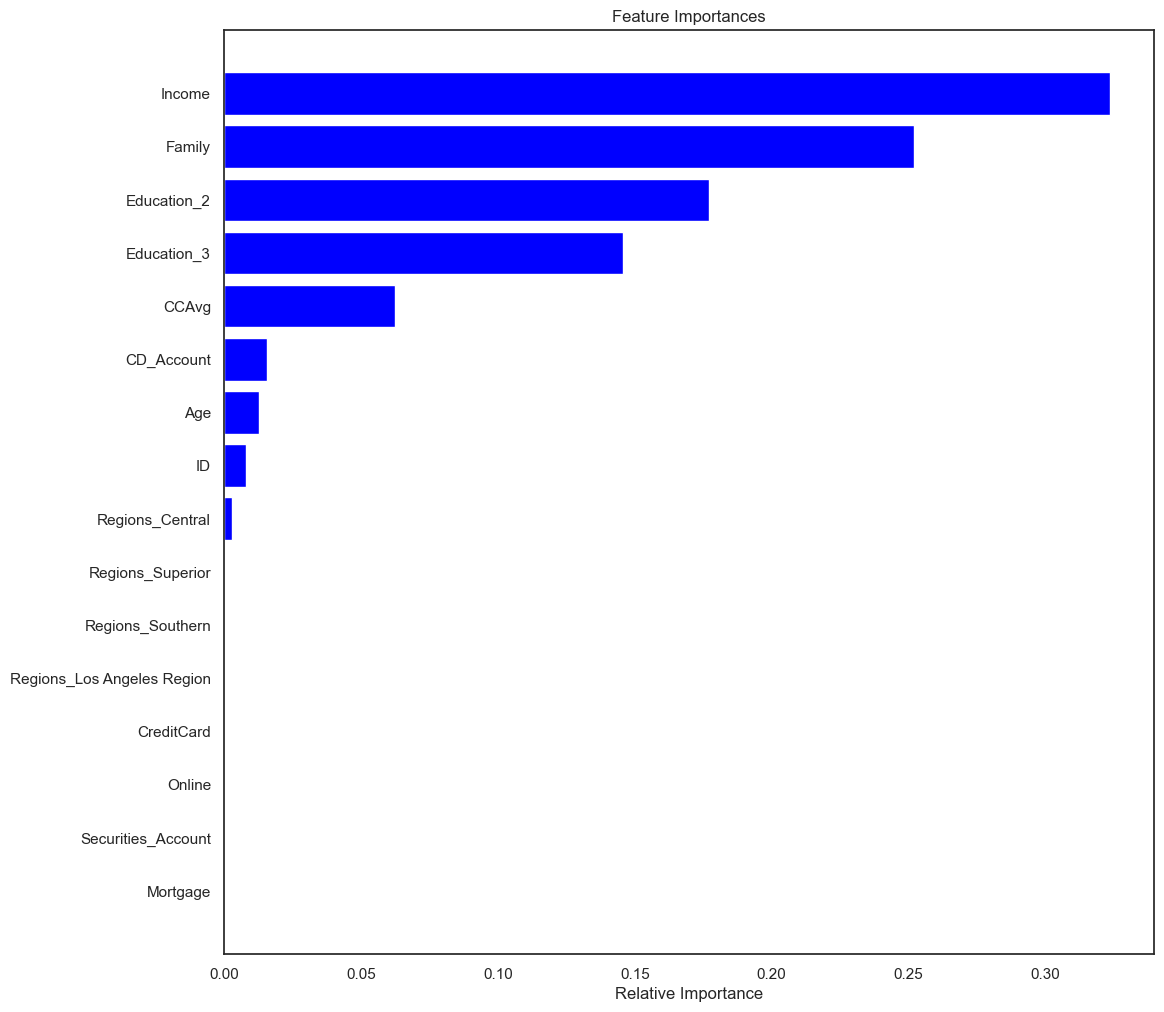

In [74]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Decision Tree Post Prunning

In [75]:
post_pru_model = DecisionTreeClassifier(ccp_alpha=0.002,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)
post_pru_model.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(ccp_alpha=0.002, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1343
           1       0.79      0.96      0.86       157

    accuracy                           0.97      1500
   macro avg       0.89      0.96      0.92      1500
weighted avg       0.97      0.97      0.97      1500

Area under the curve:  0.9628149736069547


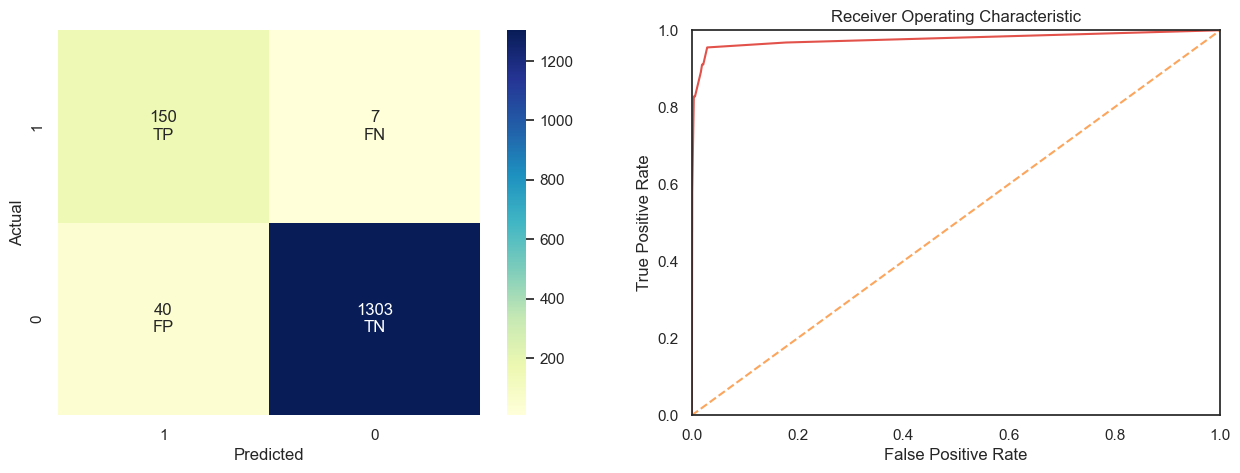

In [76]:
#get_recall_score(model)
personal_loan_prediction("Decision Tree", post_pru_model, train_X, test_X, train_y, test_y, plot=True)

In [77]:
post_pru_model.fit(train_X, train_y)
y_test_pred_dtree_postprun = post_pru_model.predict(test_X)
y_train_pred_dtree_postprune = post_pru_model.predict(train_X)

result_dtree_postpru_test=pd.DataFrame(data=[accuracy_score(test_y, y_test_pred_dtree_postprun),
                                precision_score(test_y, y_test_pred_dtree_postprun, average='macro'),
                                recall_score(test_y, y_test_pred_dtree_postprun, average='macro'),
                                f1_score(test_y, y_test_pred_dtree_postprun, average='macro')],
                          index=['Accuracy','Precision','Recall','F1-score'],
                          columns = ['Decision tree post prunning Results - Test dataset'])
result_dtree_postpru_test

Decision tree post prunning Results - Test dataset
Accuracy                                              0.96867
Precision                                             0.89207
Recall                                                0.96281
F1-score                                              0.92342

In [78]:
result_dtree_postpru_train = pd.DataFrame(data=[accuracy_score(train_y, y_train_pred_dtree_postprune),
                                precision_score(train_y, y_train_pred_dtree_postprune, average='macro'),
                                recall_score(train_y, y_train_pred_dtree_postprune, average='macro'),
                                f1_score(train_y, y_train_pred_dtree_postprune, average='macro')],
                          index=['Accuracy','Precision','Recall','F1-score'],
                          columns = ['Decison Tree post prunning Results - Train dataset'])
result_dtree_postpru_train

Decison Tree post prunning Results - Train dataset
Accuracy                                              0.97543
Precision                                             0.89542
Recall                                                0.98507
F1-score                                              0.93424

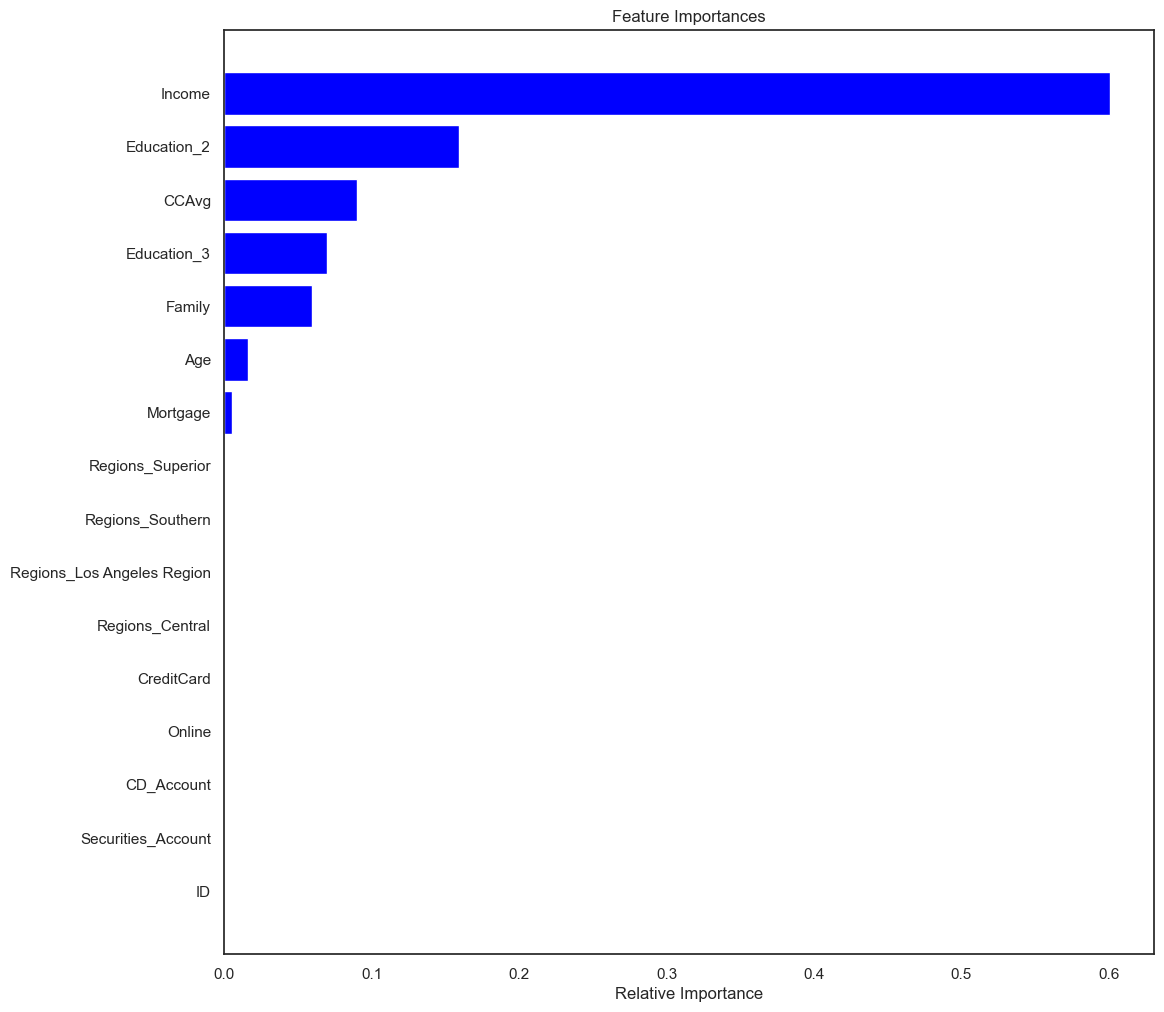

In [79]:
importances = post_pru_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Model Performance Improvement

1)We started with Logistic regression model, the accuracy was good bu the recall was not efficient

2)Then we started with decision tree model as original and we saw that it was overfitting

3)We started pre-pruning with HyperParameter max_depth=9, max_leaf_nodes=30, the overfitting on train has reduced, but the recall for test has not improved. Important features are Income,Education 2 and Education 3, Family, CCavg & Age.

4)Then we tested out model by post prunning with ccp_alpha and we got good results with both accuracy and recall, Important features are Income,Education 2 and Education 3, Family, CCavg & Age.

## Model Comparison and Final Model Selection

In [80]:
comparison_table = pd.DataFrame({'Model':['Logisitic Regression',
                                          'Initial decision tree model',
                                          'Decision treee pre-prunning with hyperparameter tuning',
                                          'Decision Tree Post Prunning'
                                          ],
                                          'Train_accuracy':[0.96,1,0.83,0.98],
                                          'Test_accuracy':[0.96,0.97,0.82,0.97],
                                          'Train_Recall':[0.81,1,0.49,0.98],
                                          'Test_Recall':[0.83,0.93,0.49,0.96]})

comparison_table

Model  Train_accuracy  \
0                                    Logisitic Regression         0.96000   
1                             Initial decision tree model         1.00000   
2  Decision treee pre-prunning with hyperparameter tuning         0.83000   
3                             Decision Tree Post Prunning         0.98000   

   Test_accuracy  Train_Recall  Test_Recall  
0        0.96000       0.81000      0.83000  
1        0.97000       1.00000      0.93000  
2        0.82000       0.49000      0.49000  
3        0.97000       0.98000      0.96000

Observations

Our rigorous analysis of the Personal Loan campaign data, employing both Exploratory Data Analysis (EDA) and model building, has offered us valuable insights into the likelihood of a customer opting for a loan

Initially, we utilized Logistic Regression to construct our model, with Recall as our key performance metric. We found that variables such as Income, Education, CD Account, Family, and CCAvg emerged as significant contributors to the classification process.

By leveraging the ROC-AUC curve and optimal threshold, we enhanced the model performance, achieving high recall and accuracy. This model thus emerged as our best-performing one.

We also explored Decision Trees, mindful of their tendency to overfit. Despite this, their minimal need for data preprocessing and their ease of understanding make them a valuable asset. We experimented with both prepruned and post-pruned Decision Trees, with the latter yielding an impressive 98% recall and 98% accuracy.

Key variables in predicting a customer propensity to purchase a personal loan included Income, Graduate degree holders, and customers with three family members. These insights equip us with a deeper understanding of our target audience, an invaluable asset in shaping future campaigns.

Conclusion

Leveraging the Decision Tree model with post-pruning has yielded impressive results, achieving an outstanding recall score of 98% on train and 96% on test dataset respectively. After Post Pruning ,the false negative has reduced to 7,This superior level of accuracy underscores the model ability to correctly identify a high percentage of actual positive cases, making it a powerful tool for our predictions.

Our Exploratory Data Analysis further illuminated the significant role that income and education play in determining whether an individual is likely to borrow a personal loan. Armed with these insights, we can better understand and interpret the relationships our model uncovers, providing a clear roadmap for our predictive efforts.

Given our priority to correctly identify as many potential loan borrowers as possible, the Decision Tree model, particularly with post-pruning, stands out as the best choice for our prediction task. Its ability to prevent overfitting and enhance generalizability, coupled with its high interpretability, makes it an ideal fit for our needs.

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

The analysis of our Personal Loan campaign data has offered us a nuanced understanding of our customer profiles and their likelihood to opt for a loan. Decision Trees and Logistic Regression, both having their own advantages, were used to derive these insights.

Decision Trees, with their low requirements for data preparation and intuitive visualization, are a valuable tool, despite their tendency to overfit. On the other hand, Logistic Regression, while more demanding in data preparation, provides a more robust model.

Our analysis has underscored the importance of factors such as Income, Education, Family size, and Average credit card spending (CCAvg), in predicting the likelihood of a customer taking a personal loan.

We have identified three distinct customer profiles:

High Profile Clients: These are individuals with high income, advanced/graduate level education, families of 3 or 4 members, and high spending habits. These customers have the highest likelihood of taking personal loans.

Average Profile: These customers have medium income levels, graduate level education, families of 3 or 4 members, and medium spending habits. They represent our second priority.

Low Profile: These customers have lower income, undergraduate education, families of 3 or 4 members, and low spending habits. Currently, our model has difficulty identifying exceptional cases within this group who may be inclined to take a personal loan. Additionally, customer average spending and mortgage details also play a role in the decision to take a personal loan, as indicated by both EDA and Logistic Regression.

For our campaign strategy, we suggest initially targeting high-profile customers with personal relationship managers. These professionals can address any concerns and persuade these customers to opt for a loan with competitive interest rates. Prequalifying for loans can also be a significant draw for these customers.

Next, our focus should shift to the average profile customers, creating tailored strategies for this group.

___